# Table of Contents
 <p><div class="lev1"><a href="#Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2"><a href="#Dynamic-Network-Analysis-of-Enron-Email-Network-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dynamic Network Analysis of Enron Email Network Data</a></div><div class="lev2"><a href="#Data-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocessing</a></div><div class="lev1"><a href="#Import-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries</a></div><div class="lev1"><a href="#Import-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Data</a></div><div class="lev1"><a href="#Data-Partition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Partition</a></div><div class="lev2"><a href="#Break-data-into-years-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Break data into years</a></div><div class="lev2"><a href="#Create-networks-at-different-timesteps-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create networks at different timesteps</a></div><div class="lev3"><a href="#t-=-0-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>t = 0</a></div><div class="lev3"><a href="#t-=1-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>t =1</a></div><div class="lev3"><a href="#t-=-2-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>t = 2</a></div><div class="lev3"><a href="#t-=-3-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>t = 3</a></div><div class="lev3"><a href="#t-=-4-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>t = 4</a></div><div class="lev3"><a href="#t-=-5-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>t = 5</a></div><div class="lev1"><a href="#Network-Statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Network Statistics</a></div><div class="lev2"><a href="#Centrality-analysis-without-averaging-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Centrality analysis without averaging</a></div><div class="lev3"><a href="#Degree-Centrality-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Degree Centrality</a></div><div class="lev3"><a href="#Eigenvector-Centrality-Histograms-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Eigenvector Centrality Histograms</a></div><div class="lev3"><a href="#Closeness-Centrality-Histograms-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Closeness Centrality Histograms</a></div><div class="lev3"><a href="#Betweenness-Centrality-Histogram-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Betweenness Centrality Histogram</a></div><div class="lev3"><a href="#Communicability-Centrality-Histograms-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Communicability Centrality Histograms</a></div><div class="lev3"><a href="#Katz-Centrality-Histograms-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Katz Centrality Histograms</a></div><div class="lev3"><a href="#Load-Centrality-5.1.7"><span class="toc-item-num">5.1.7&nbsp;&nbsp;</span>Load Centrality</a></div><div class="lev2"><a href="#Centrality-Analysis-with-averaging-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Centrality Analysis with averaging</a></div><div class="lev2"><a href="#Calculate-Centrality-Statistics-at-different-time-steps-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Calculate Centrality Statistics at different time steps</a></div><div class="lev1"><a href="#Assortativity-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Assortativity Analysis</a></div><div class="lev2"><a href="#Calculate-Assortativity-statistics-for-each-time-step-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculate Assortativity statistics for each time step</a></div><div class="lev1"><a href="#HITS-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>HITS Analysis</a></div><div class="lev1"><a href="#Stationarity-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Stationarity</a></div>

# Introduction

## Dynamic Network Analysis of Enron Email Network Data

I use the Enron email network data from [John Hopkins](http://cis.jhu.edu/~parky/Enron/enron.html) which has time, sender and receiver pair format data.

## Data Preprocessing

From the JHU data, I have done the following in Excel:
- The first column represents seconds elapsed since 1 January 1970, so I convert this in to days
- I then add these days to the date to get time stamps for all nodes
- From the timestamps, I extract the year field
- The network can be partitioned by year in a cumulative manner for DNA

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')
import random
random.seed(1111111111111)
plt.rc('axes', grid=False, titlesize='large', labelsize='medium',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('font',family='serif',size=12, serif='Georgia')
plt.rc('figure', figsize = (15,6),titlesize='large',titleweight='heavy')
plt.rc('grid',linewidth=3)
sns.set_palette('husl')
from scipy.signal import *

# Import Data

In [2]:
data = pd.read_excel("../Data/execs.email.linesnum.xlsx")

In [3]:
data.head()

sec  to   from                date  year
0  315522000   24   153 1979-12-31 21:00:00  1979
1  315522000   24   153 1979-12-31 21:00:00  1979
2  315522000   29    29 1979-12-31 21:00:00  1979
3  315522000   29    29 1979-12-31 21:00:00  1979
4  315522000   29    29 1979-12-31 21:00:00  1979

In [4]:
data.min()

sec               315522000
to                        0
from                      0
date    1979-12-31 21:00:00
year                   1979
dtype: object

In [5]:
data.max()

sec              1024688419
to                      183
from                    183
date    2002-06-21 19:40:19
year                   2002
dtype: object

# Data Partition

In [6]:
#year = data['year'].unique()
year = sorted(set(data['year']))
year


[1979, 1998, 1999, 2000, 2001, 2002]

In [7]:
sorted(set(data['year']))

[1979, 1998, 1999, 2000, 2001, 2002]

In [8]:
data.drop(["sec", "date"], axis=1,inplace=True)

In [9]:
data.head()

to   from  year
0   24   153  1979
1   24   153  1979
2   29    29  1979
3   29    29  1979
4   29    29  1979

## Break data into years

In [10]:
G0 = data[data["year"]==year[0]]
G1 = data[data["year"]==year[1]]
G2 = data[data["year"]==year[2]]
G3 = data[data["year"]==year[3]]
G4 = data[data["year"]==year[4]]
G5 = data[data["year"]==year[5]]

In [210]:
G1.size,G1.shape

(246, (82, 3), 82)

In [205]:
G2.size,G1.shape

(11145, (82, 3))

In [206]:
G3.size,G1.shape

(132177, (82, 3))

In [207]:
G3.size,G1.shape

(132177, (82, 3))

In [208]:
G4.size,G1.shape

(206664, (82, 3))

In [209]:
G5.size,G1.shape

(25473, (82, 3))

In [11]:
G1.head()

to   from  year
174  114   169  1998
175  114   169  1998
176  114   123  1998
177  114   123  1998
178  114   123  1998

In [12]:
G1.tail()

to   from  year
251  112    65  1998
252  112   114  1998
253  112   114  1998
254  112   145  1998
255  112   145  1998

In [13]:
G2.head()

to   from  year
256  114    65  1999
257  114    65  1999
258  114   169  1999
259  114   169  1999
260  114   112  1999

In [14]:
G3.head()

to   from  year
3971   82    51  2000
3972   82    51  2000
3973   82    51  2000
3974   82    51  2000
3975   82    51  2000

## Create networks at different timesteps

### t = 0

In [213]:
G0_ = np.asarray(G0.ix[:,:2])
Gt0 = nx.Graph()
Gt0= nx.from_edgelist(G0_)

### t =1

In [214]:
G1_ = G1.ix[:,:2]
G1_ = np.concatenate((G1_,G0_), axis=0)
Gt1 = nx.Graph()
Gt1= nx.from_edgelist(G1_)

### t = 2

In [215]:
G2_ = G2.ix[:,:2]
G2_ = np.concatenate((G2_,G1_), axis=0)
Gt2 = nx.Graph()
Gt2= nx.from_edgelist(G2_)

### t = 3

In [216]:
G3_ = G3.ix[:,:2]
G3_ = np.concatenate((G3_,G2_), axis=0)
Gt3 = nx.Graph()
Gt3= nx.from_edgelist(G3_)

### t = 4

In [217]:
G4_ = G4.ix[:,:2]
G4_ = np.concatenate((G4_,G3_), axis=0)
Gt4 = nx.Graph()
Gt4= nx.from_edgelist(G4_)

### t = 5

In [218]:
G5_ = G5.ix[:,:2]
G5_ = np.concatenate((G5_,G4_), axis=0)
Gt5 = nx.Graph()
Gt5= nx.from_edgelist(G5_)

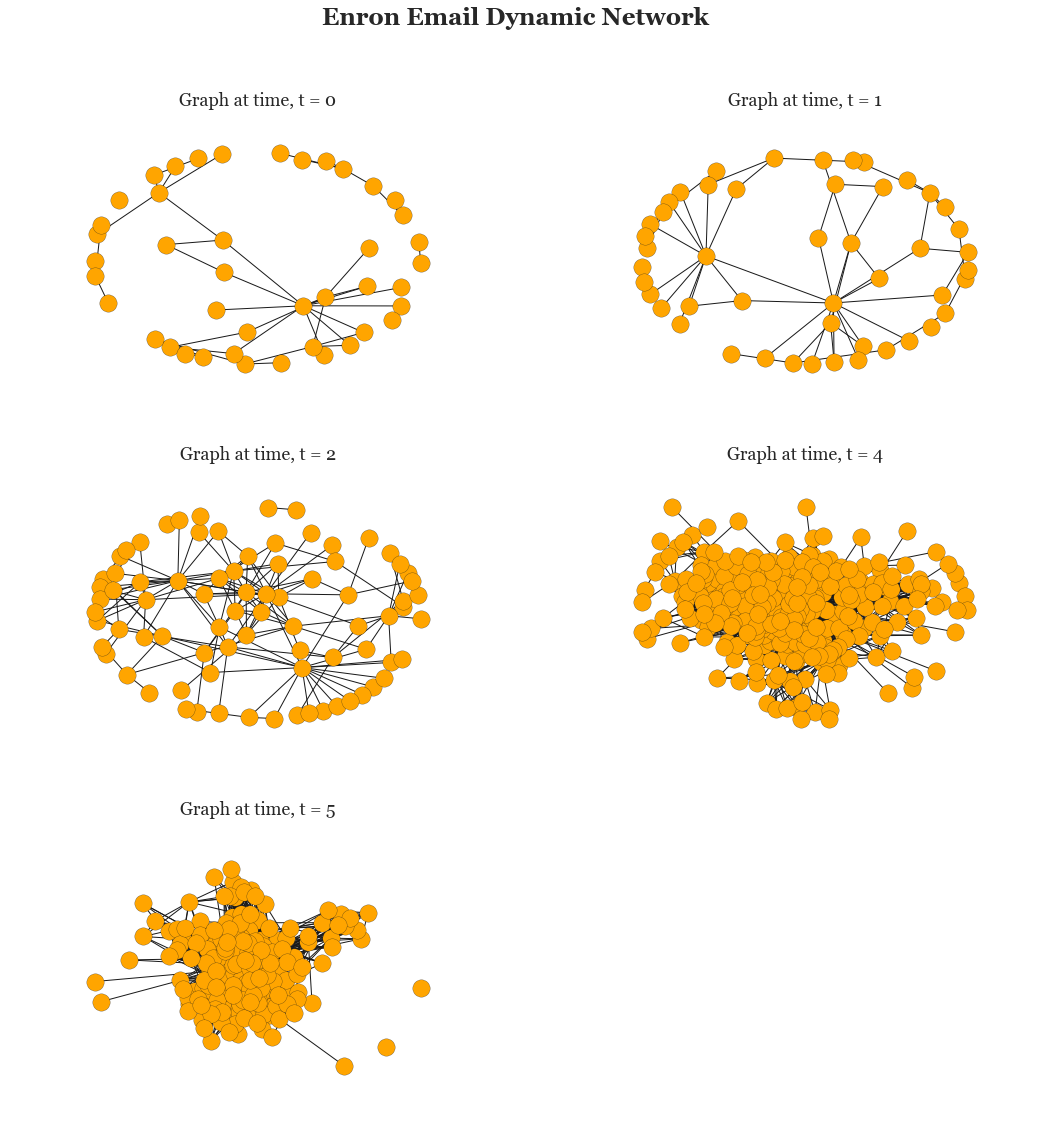

In [219]:
#Plot graphs together
plt.figure(figsize=(18,18))
plt.suptitle('Enron Email Dynamic Network', fontsize=24)
plt.subplot(321)
nx.draw_spring(Gt0, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 0", fontsize=18)

plt.subplot(322)
nx.draw_spring(Gt1, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 1", fontsize=18)

plt.subplot(323)
nx.draw_spring(Gt2, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 2", fontsize=18)

plt.subplot(324)
nx.draw_spring(Gt3, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 3", fontsize=18)

plt.subplot(324)
nx.draw_spring(Gt4, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 4", fontsize=18)

plt.subplot(325)
nx.draw_spring(Gt5, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 5", fontsize=18)

plt.show()

# Network Statistics

## Centrality analysis without averaging

Define some helper functions here

In [25]:
def get_cent(net):
    degC = nx.degree_centrality(net)
    cloC = nx.closeness_centrality(net)
    betC = nx.betweenness_centrality(net)
    eigC = nx.eigenvector_centrality_numpy(net)
    commCC = nx.communicability_centrality(net)
    katzC = nx.katz_centrality_numpy(net)
    loadC = nx.load_centrality(net)
    
    return [degC,cloC,betC,eigC,commCC,katzC, loadC]

In [26]:
def get_val(val):
    return sorted(set(val.values()))

In [27]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])

In [28]:
def fft_sig(att):
    return sc.fft(get_val(att))

def hilbert_sig(att):
    return hilbert(get_val(att))

**Calculate all centralities in one go**

In [29]:
degC0, cloC0, betC0, eigC0, commuC0, katzC0, loadC0 = get_cent(Gt0)
degC1, cloC1, betC1, eigC1, commuC1, katzC1, loadC1 = get_cent(Gt1)
degC2, cloC2, betC2, eigC2, commuC2, katzC2, loadC2 = get_cent(Gt2)
degC3, cloC3, betC3, eigC3, commuC3, katzC3, loadC3 = get_cent(Gt3)
degC4, cloC4, betC4, eigC4, commuC4, katzC4, loadC4 = get_cent(Gt4)
degC5, cloC5, betC5, eigC5, commuC5, katzC5, loadC5 = get_cent(Gt5)

### Degree Centrality

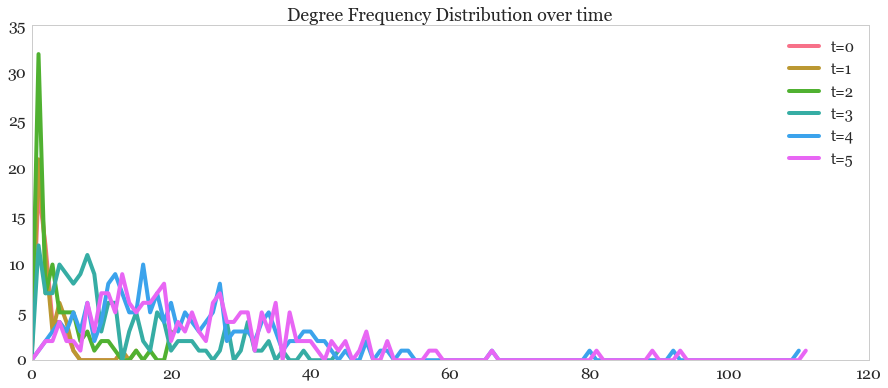

In [30]:
plt.title("Degree Frequency Distribution over time", fontsize=18)
plt.plot(nx.degree_histogram(Gt0), label='t=0')
plt.plot(nx.degree_histogram(Gt1), label='t=1')
plt.plot(nx.degree_histogram(Gt2), label='t=2')
plt.plot(nx.degree_histogram(Gt3), label='t=3')
plt.plot(nx.degree_histogram(Gt4), label='t=4')
plt.plot(nx.degree_histogram(Gt5), label='t=5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


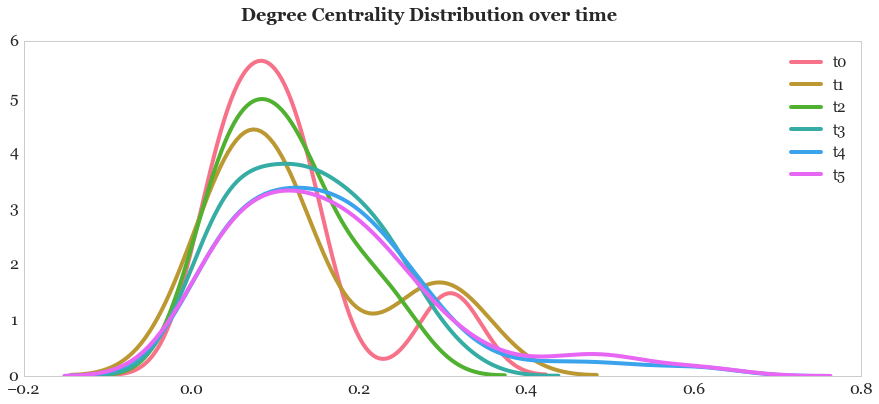

In [31]:
plt.suptitle('Degree Centrality Distribution over time', fontsize=18)
sns.distplot(get_val(degC0), hist=False, label='t0')
sns.distplot(get_val(degC1), hist=False, label='t1')
sns.distplot(get_val(degC2), hist=False, label='t2')
sns.distplot(get_val(degC3), hist=False, label='t3')
sns.distplot(get_val(degC4), hist=False, label='t4')
sns.distplot(get_val(degC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


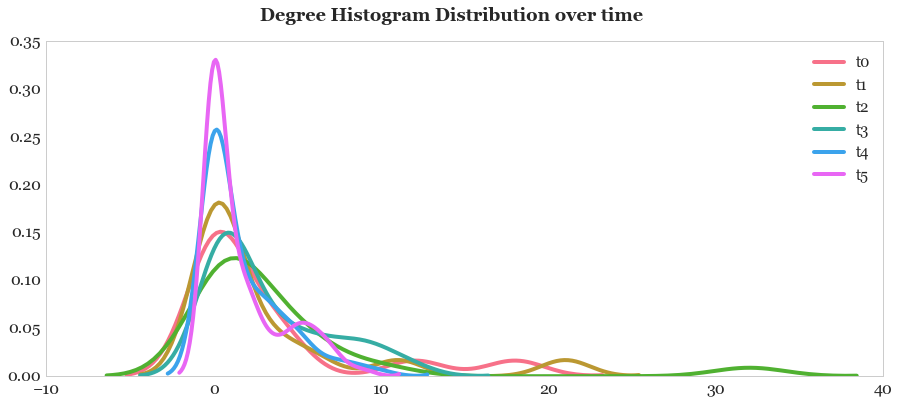

In [32]:
plt.suptitle('Degree Histogram Distribution over time', fontsize=18)
sns.distplot(nx.degree_histogram(Gt0), hist=False, label='t0')
sns.distplot(nx.degree_histogram(Gt1), hist=False, label='t1')
sns.distplot(nx.degree_histogram(Gt2), hist=False, label='t2')
sns.distplot(nx.degree_histogram(Gt3), hist=False, label='t3')
sns.distplot(nx.degree_histogram(Gt4), hist=False, label='t4')
sns.distplot(nx.degree_histogram(Gt5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

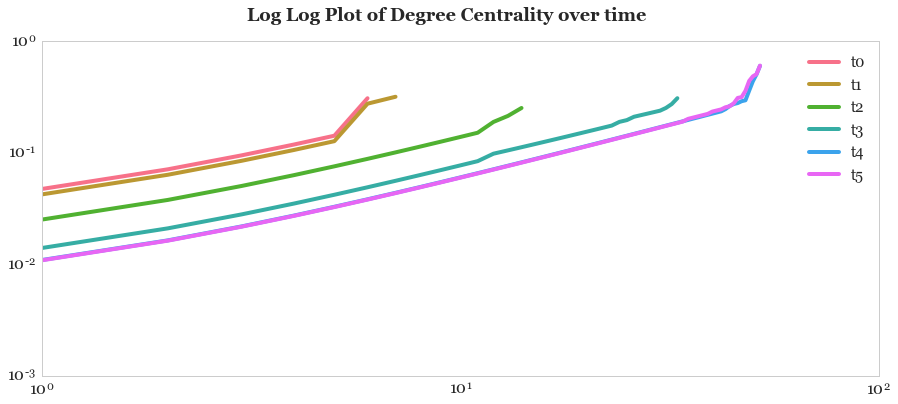

In [33]:
plt.suptitle('Log Log Plot of Degree Centrality over time', fontsize=18)

plt.loglog(get_val(degC0), label='t0')
plt.loglog(get_val(degC1), label='t1')
plt.loglog(get_val(degC2), label='t2') 
plt.loglog(get_val(degC3), label='t3')
plt.loglog(get_val(degC4), label='t4')
plt.loglog(get_val(degC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

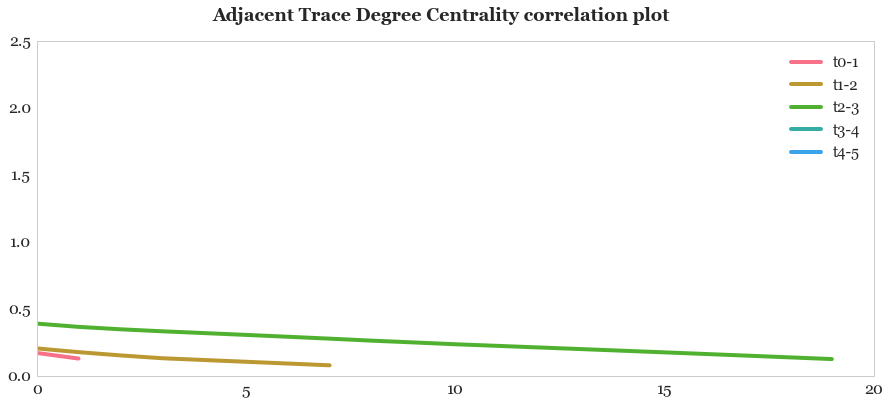

In [34]:
plt.suptitle('Adjacent Trace Degree Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(degC0),get_val(degC1)),label='t0-1')
plt.plot(np.correlate(get_val(degC1),get_val(degC2)),label='t1-2')
plt.plot(np.correlate(get_val(degC2),get_val(degC3)),label='t2-3')
plt.plot(np.correlate(get_val(degC3),get_val(degC3)),label='t3-4') 
plt.plot(np.correlate(get_val(degC4),get_val(degC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

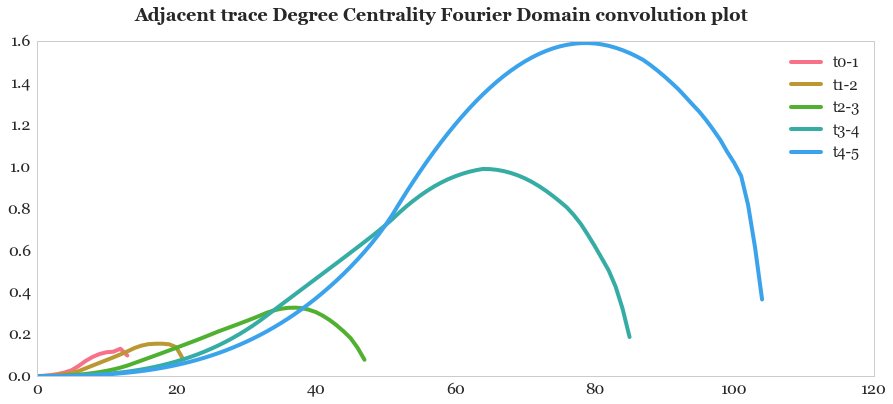

In [35]:
plt.suptitle('Adjacent trace Degree Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(degC0),get_val(degC1)),label='t0-1')
plt.plot(fftconvolve(get_val(degC1),get_val(degC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(degC2),get_val(degC3)), label='t2-3')
plt.plot(fftconvolve(get_val(degC3),get_val(degC4)), label='t3-4')
plt.plot(fftconvolve(get_val(degC4),get_val(degC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


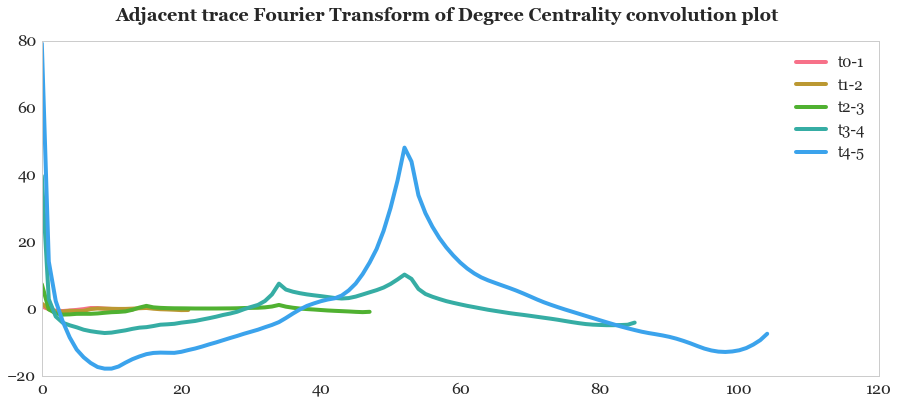

In [36]:
plt.suptitle('Adjacent trace Fourier Transform of Degree Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(degC0),fft_sig(degC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(degC1),fft_sig(degC2)),  label='t1-2')
plt.plot(np.convolve(fft_sig(degC2),fft_sig(degC3)), label='t2-3')
plt.plot(np.convolve(fft_sig(degC3),fft_sig(degC4)), label='t3-4')
plt.plot(np.convolve(fft_sig(degC4),fft_sig(degC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


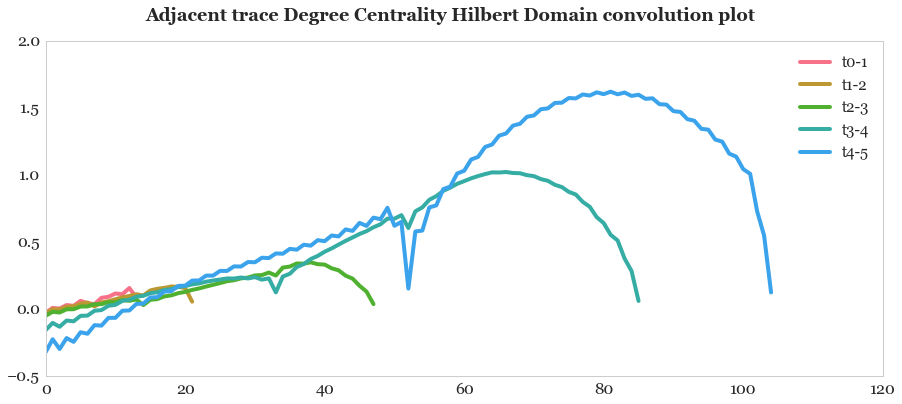

In [37]:
plt.suptitle('Adjacent trace Degree Centrality Hilbert Domain convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert(get_val(degC0)), hilbert(get_val(degC1))),  label='t0-1')
plt.plot(np.convolve(hilbert(get_val(degC1)), hilbert(get_val(degC2))),  label='t1-2')
plt.plot(np.convolve(hilbert(get_val(degC2)), hilbert(get_val(degC3))), label='t2-3')
plt.plot(np.convolve(hilbert(get_val(degC3)), hilbert(get_val(degC4))), label='t3-4')
plt.plot(np.convolve(hilbert(get_val(degC4)), hilbert(get_val(degC5))),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Eigenvector Centrality Histograms

**Plotting the Eigenvector Centrality for the different timesteps here. For the first plot it is difficult to discern the trends when all the 6 distributions are plotted together. So in the next series of plots I look at a few a time and its easier to see the change over time. The signal essentially becomes more spiked and squashed over time. **

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


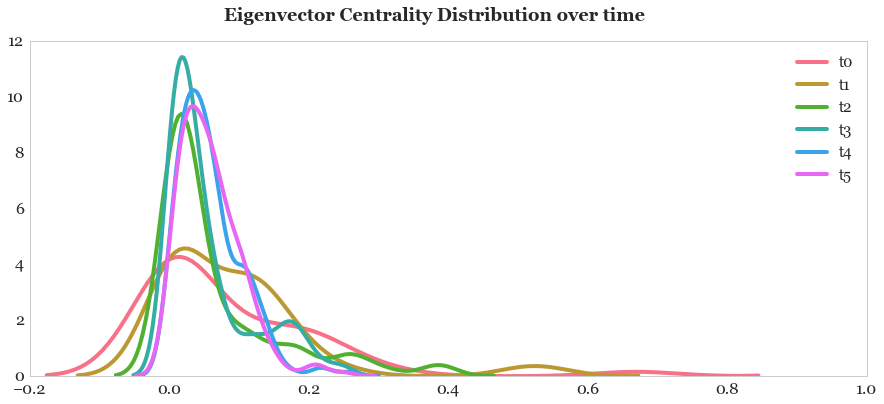

In [38]:
plt.suptitle('Eigenvector Centrality Distribution over time', fontsize=18)
sns.distplot(get_val(eigC0), hist=False, label='t0')
sns.distplot(get_val(eigC1), hist=False, label='t1')
sns.distplot(get_val(eigC2), hist=False, label='t2')
sns.distplot(get_val(eigC3), hist=False, label='t3')
sns.distplot(get_val(eigC4), hist=False, label='t4')
sns.distplot(get_val(eigC5), hist=False, label='t5')
             
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

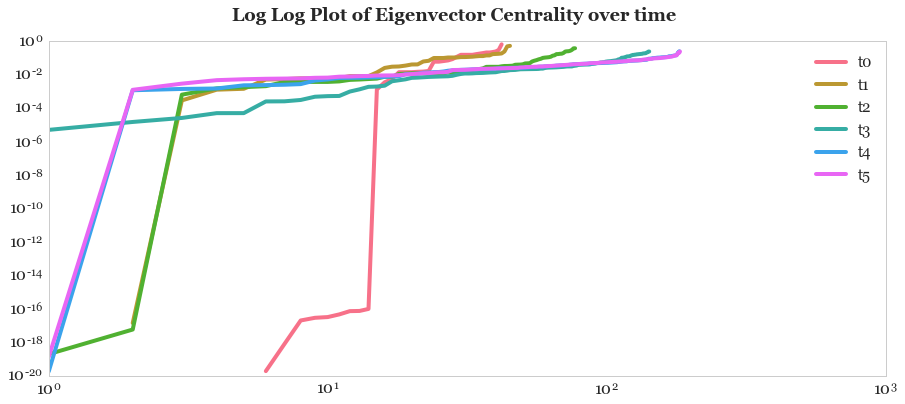

In [39]:
plt.suptitle('Log Log Plot of Eigenvector Centrality over time', fontsize=18)

plt.loglog(get_val(eigC0), label='t0')
plt.loglog(get_val(eigC1), label='t1')
plt.loglog(get_val(eigC2), label='t2') 
plt.loglog(get_val(eigC3), label='t3')
plt.loglog(get_val(eigC4), label='t4')
plt.loglog(get_val(eigC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

In [40]:
eigC0_a = np.asarray(get_val(eigC0))
eigC1_a = np.asarray(get_val(eigC1))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


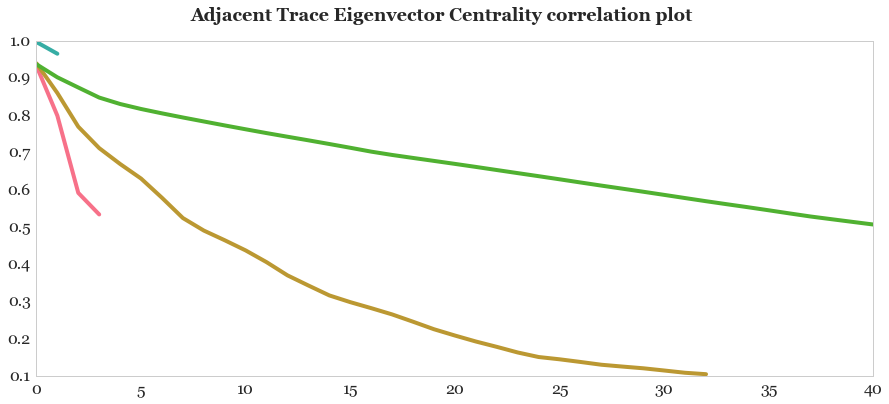

In [41]:
plt.suptitle('Adjacent Trace Eigenvector Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(eigC0_a,eigC1_a))
plt.plot(np.correlate(get_val(eigC1),get_val(eigC2)))
plt.plot(np.correlate(get_val(eigC3),get_val(eigC4)))
plt.plot(np.correlate(get_val(eigC4),get_val(eigC5)))

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

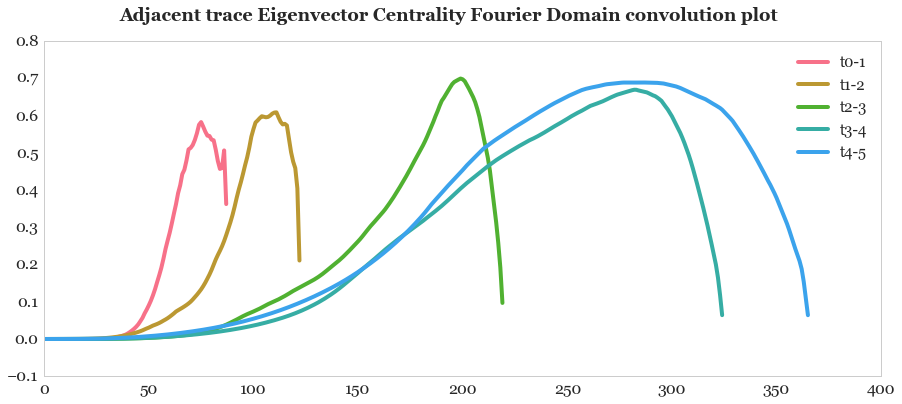

In [42]:
plt.suptitle('Adjacent trace Eigenvector Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(eigC0),get_val(eigC1)),  label='t0-1')
plt.plot(fftconvolve(get_val(eigC1),get_val(eigC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(eigC2),get_val(eigC3)), label='t2-3')
plt.plot(fftconvolve(get_val(eigC3),get_val(eigC4)), label='t3-4')
plt.plot(fftconvolve(get_val(eigC4),get_val(eigC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


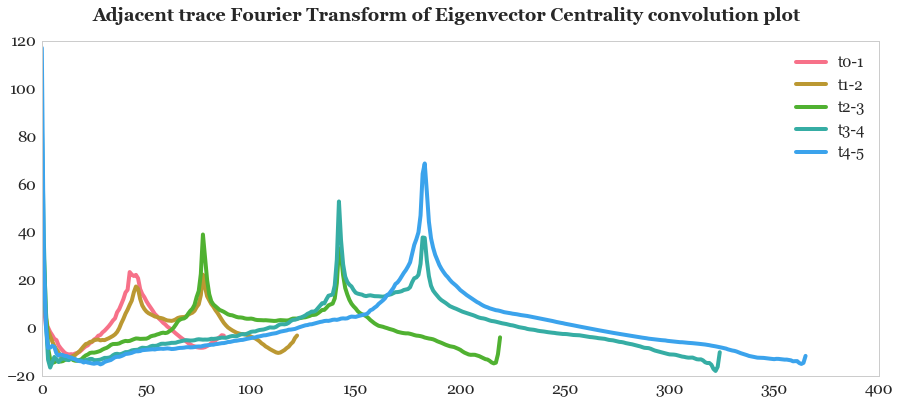

In [43]:
plt.suptitle('Adjacent trace Fourier Transform of Eigenvector Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(eigC0),fft_sig(eigC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(eigC1),fft_sig(eigC2)),  label='t1-2')
plt.plot(np.convolve(fft_sig(eigC2),fft_sig(eigC3)), label='t2-3')
plt.plot(np.convolve(fft_sig(eigC3),fft_sig(eigC4)), label='t3-4')
plt.plot(np.convolve(fft_sig(eigC4),fft_sig(eigC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


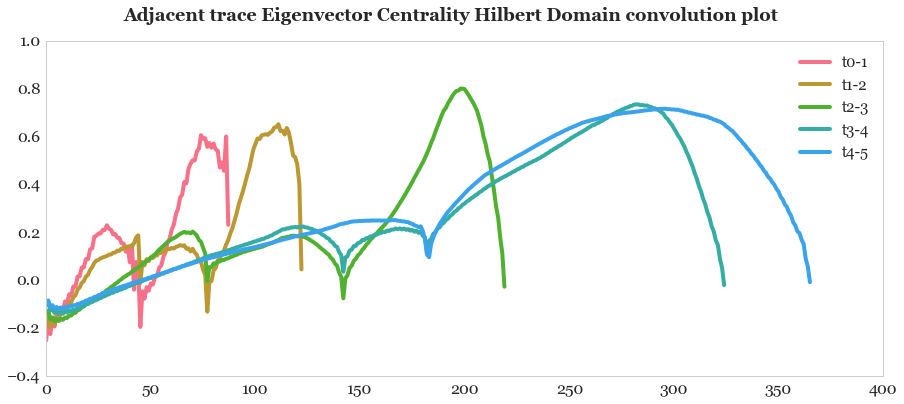

In [44]:
plt.suptitle('Adjacent trace Eigenvector Centrality Hilbert Domain convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert(get_val(eigC0)), hilbert(get_val(eigC1))),  label='t0-1')
plt.plot(np.convolve(hilbert(get_val(eigC1)), hilbert(get_val(eigC2))),  label='t1-2')
plt.plot(np.convolve(hilbert(get_val(eigC2)), hilbert(get_val(eigC3))), label='t2-3')
plt.plot(np.convolve(hilbert(get_val(eigC3)), hilbert(get_val(eigC4))), label='t3-4')
plt.plot(np.convolve(hilbert(get_val(eigC4)), hilbert(get_val(eigC5))),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

In [45]:
print(np.correlate(eigC0_a,eigC1_a))
print(np.correlate(eigC0_a,eigC1_a)/np.sqrt(np.correlate(eigC0_a,eigC1_a)))

[ 0.934373    0.8003439   0.59281644  0.53482695]
[ 0.96662971  0.89461941  0.76994574  0.73131864]


### Closeness Centrality Histograms

**The Closeness Centrality shows a much better evolution over time than the Eigenvector Centrality Histograms**

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


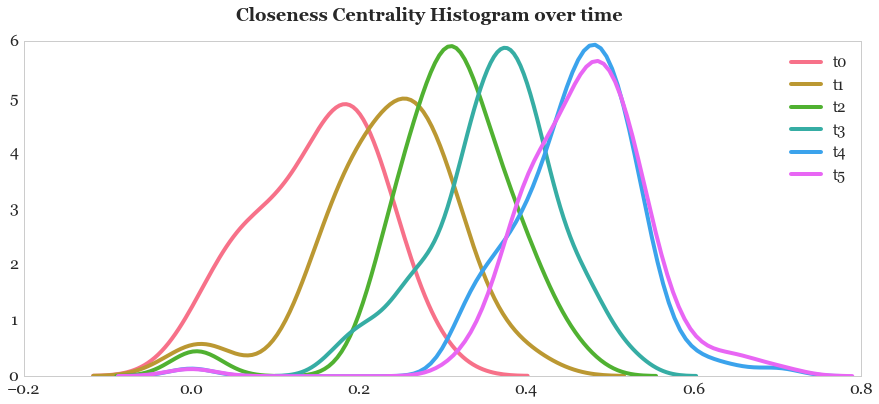

In [46]:
plt.suptitle('Closeness Centrality Histogram over time', fontsize=18)
sns.distplot(get_val(cloC0), hist=False, label='t0')
sns.distplot(get_val(cloC1), hist=False, label='t1')
sns.distplot(get_val(cloC2), hist=False, label='t2')
sns.distplot(get_val(cloC3), hist=False, label='t3')
sns.distplot(get_val(cloC4), hist=False, label='t4')
sns.distplot(get_val(cloC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

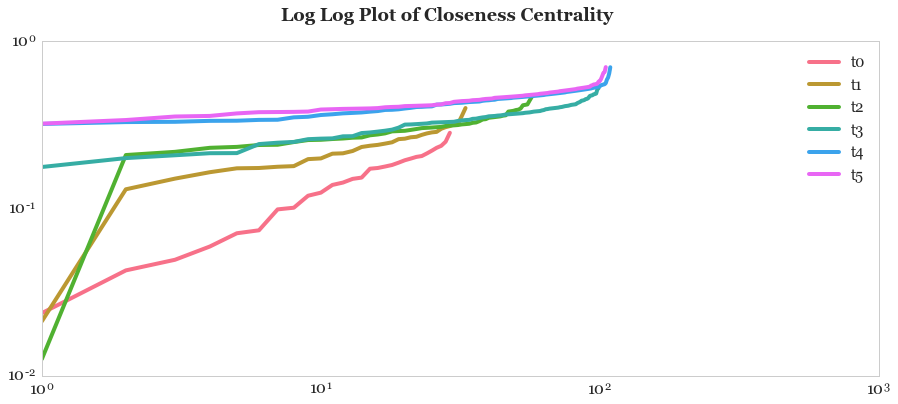

In [47]:
plt.suptitle('Log Log Plot of Closeness Centrality', fontsize=18)

plt.loglog(get_val(cloC0),label='t0')
plt.loglog(get_val(cloC1),label='t1')
plt.loglog(get_val(cloC2),label='t2')
plt.loglog(get_val(cloC3),label='t3')
plt.loglog(get_val(cloC4),label='t4')
plt.loglog(get_val(cloC5),label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

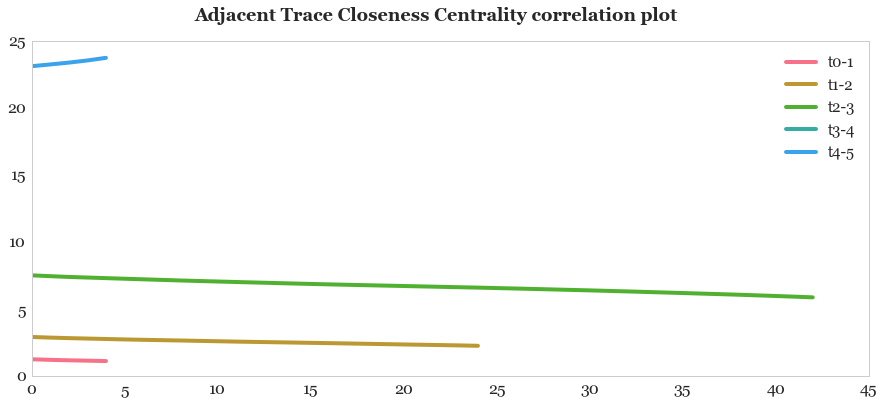

In [48]:
plt.suptitle('Adjacent Trace Closeness Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(cloC0),get_val(cloC1)),label='t0-1')
plt.plot(np.correlate(get_val(cloC1),get_val(cloC2)),label='t1-2')
plt.plot(np.correlate(get_val(cloC2),get_val(cloC3)),label='t2-3')
plt.plot(np.correlate(get_val(cloC3),get_val(cloC3)),label='t3-4') 
plt.plot(np.correlate(get_val(cloC4),get_val(cloC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

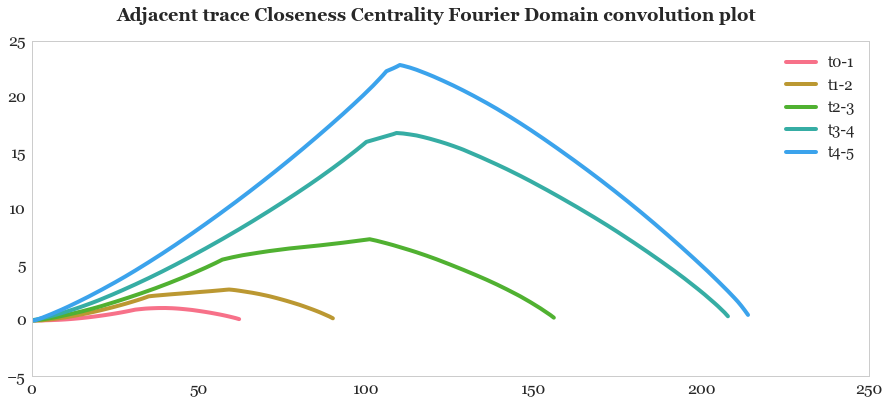

In [49]:
plt.suptitle('Adjacent trace Closeness Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(cloC0),get_val(cloC1)),label='t0-1')
plt.plot(fftconvolve(get_val(cloC1),get_val(cloC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(cloC2),get_val(cloC3)), label='t2-3')
plt.plot(fftconvolve(get_val(cloC3),get_val(cloC4)), label='t3-4')
plt.plot(fftconvolve(get_val(cloC4),get_val(cloC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


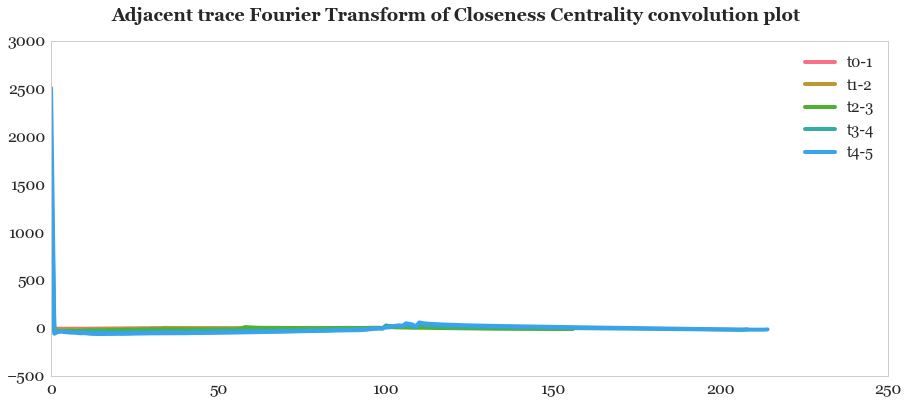

In [50]:
plt.suptitle('Adjacent trace Fourier Transform of Closeness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(cloC0),fft_sig(cloC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(cloC1),fft_sig(cloC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(cloC2),fft_sig(cloC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(cloC3),fft_sig(cloC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(cloC4),fft_sig(cloC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


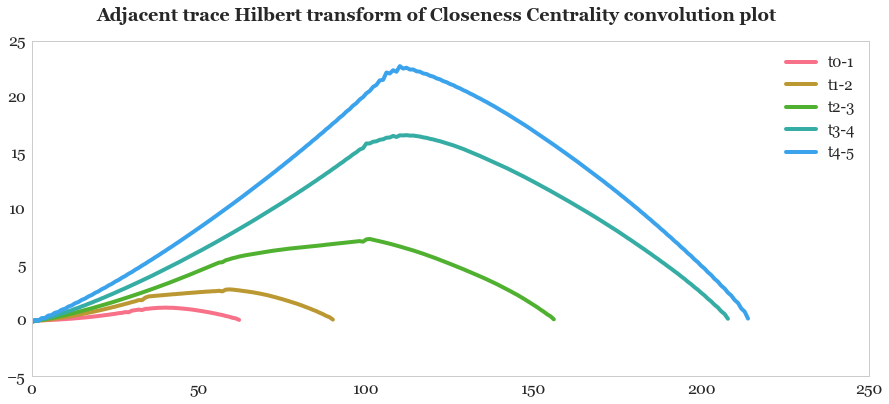

In [51]:
plt.suptitle('Adjacent trace Hilbert transform of Closeness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(cloC0), hilbert_sig(cloC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(cloC1), hilbert_sig(cloC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(cloC2), hilbert_sig(cloC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(cloC3), hilbert_sig(cloC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(cloC4), hilbert_sig(cloC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Betweenness Centrality Histogram

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


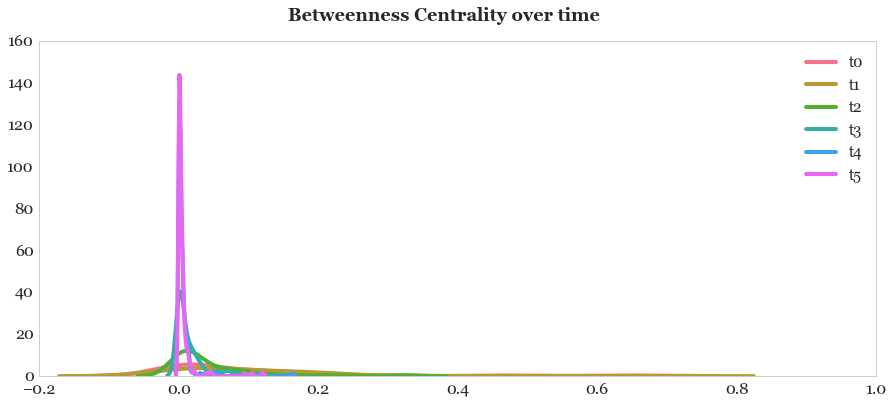

In [52]:
plt.suptitle('Betweenness Centrality over time', fontsize=18)
sns.distplot(get_val(betC0), hist=False, label='t0')
sns.distplot(get_val(betC1), hist=False, label='t1')
sns.distplot(get_val(betC2), hist=False, label='t2')
sns.distplot(get_val(betC3), hist=False, label='t3')
sns.distplot(get_val(betC4), hist=False, label='t4')
sns.distplot(get_val(betC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

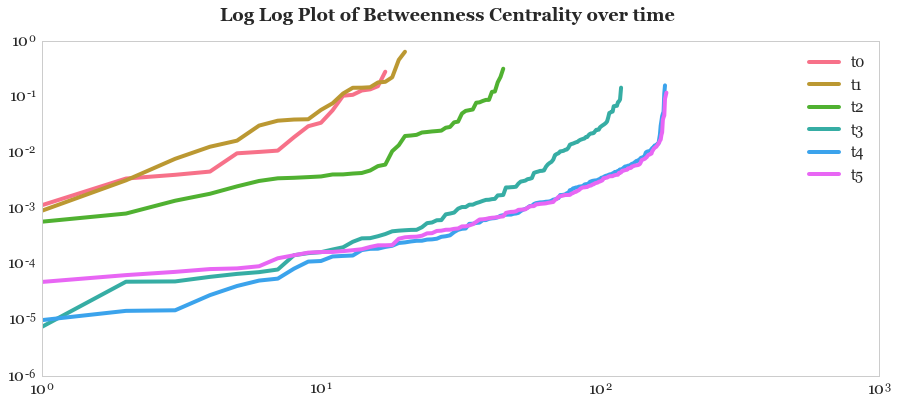

In [53]:
plt.suptitle('Log Log Plot of Betweenness Centrality over time', fontsize=18)

plt.loglog(get_val(betC0), label='t0')
plt.loglog(get_val(betC1), label='t1')
plt.loglog(get_val(betC2), label='t2') 
plt.loglog(get_val(betC3), label='t3')
plt.loglog(get_val(betC4), label='t4')
plt.loglog(get_val(betC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

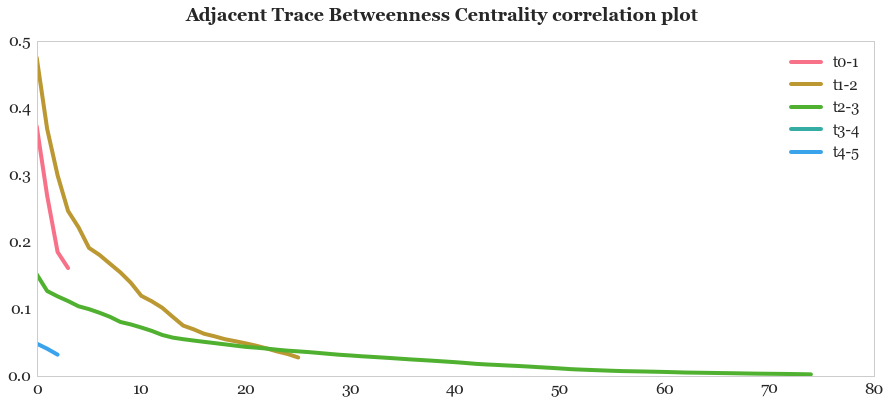

In [54]:
plt.suptitle('Adjacent Trace Betweenness Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(betC0),get_val(betC1)),label='t0-1')
plt.plot(np.correlate(get_val(betC1),get_val(betC2)),label='t1-2')
plt.plot(np.correlate(get_val(betC2),get_val(betC3)),label='t2-3')
plt.plot(np.correlate(get_val(betC3),get_val(betC3)),label='t3-4') 
plt.plot(np.correlate(get_val(betC4),get_val(betC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

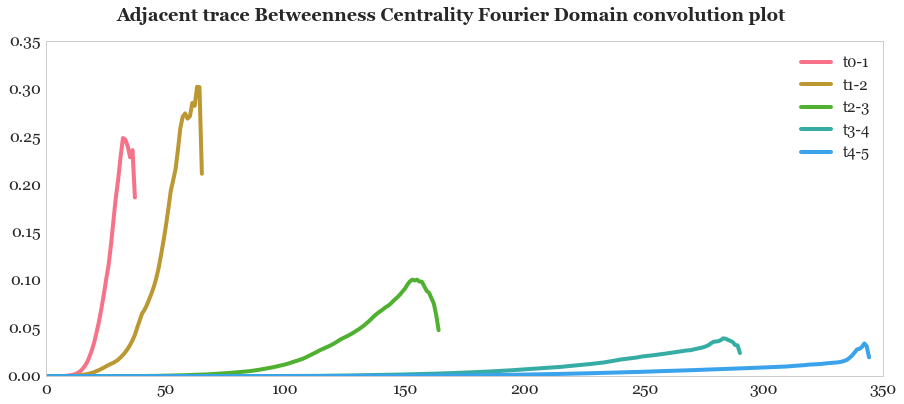

In [55]:
plt.suptitle('Adjacent trace Betweenness Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(betC0),get_val(betC1)),label='t0-1')
plt.plot(fftconvolve(get_val(betC1),get_val(betC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(betC2),get_val(betC3)), label='t2-3')
plt.plot(fftconvolve(get_val(betC3),get_val(betC4)), label='t3-4')
plt.plot(fftconvolve(get_val(betC4),get_val(betC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


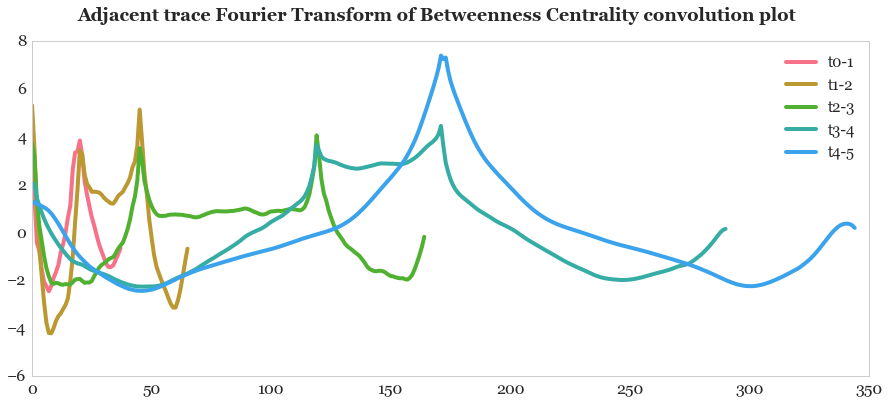

In [56]:
plt.suptitle('Adjacent trace Fourier Transform of Betweenness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(betC0),fft_sig(betC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(betC1),fft_sig(betC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(betC2),fft_sig(betC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(betC3),fft_sig(betC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(betC4),fft_sig(betC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


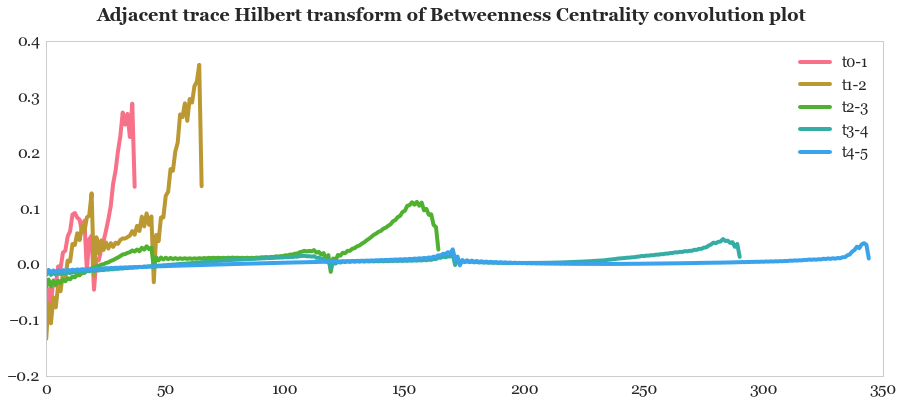

In [57]:
plt.suptitle('Adjacent trace Hilbert transform of Betweenness Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(betC0), hilbert_sig(betC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(betC1), hilbert_sig(betC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(betC2), hilbert_sig(betC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(betC3), hilbert_sig(betC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(betC4), hilbert_sig(betC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Communicability Centrality Histograms

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


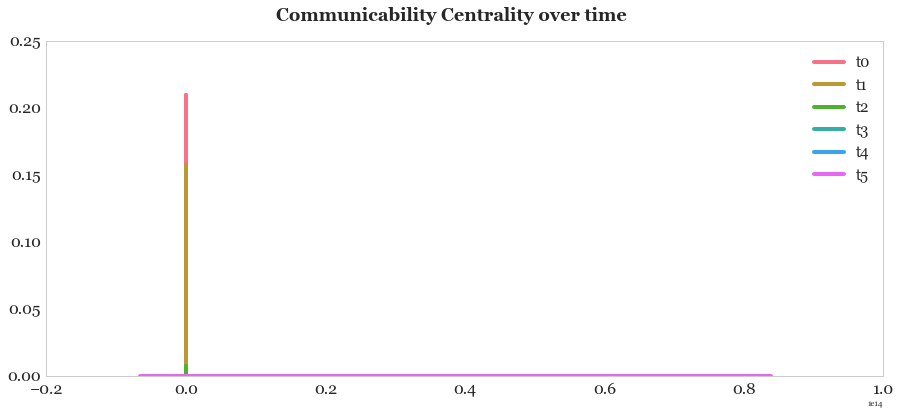

In [58]:
plt.suptitle('Communicability Centrality over time', fontsize=18)
sns.distplot(get_val(commuC0), hist=False, label='t0')
sns.distplot(get_val(commuC1), hist=False, label='t1')
sns.distplot(get_val(commuC2), hist=False, label='t2')
sns.distplot(get_val(commuC3), hist=False, label='t3')
sns.distplot(get_val(commuC4), hist=False, label='t4')
sns.distplot(get_val(commuC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

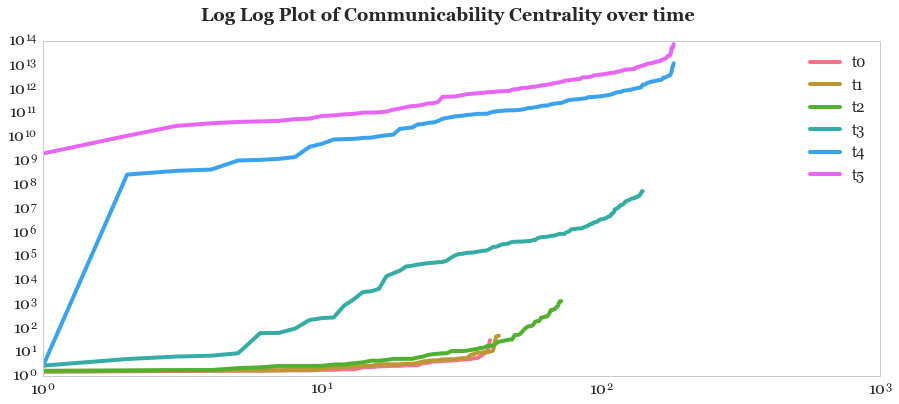

In [59]:
plt.suptitle('Log Log Plot of Communicability Centrality over time', fontsize=18)

plt.loglog(get_val(commuC0), label='t0')
plt.loglog(get_val(commuC1), label='t1')
plt.loglog(get_val(commuC2), label='t2') 
plt.loglog(get_val(commuC3), label='t3')
plt.loglog(get_val(commuC4), label='t4')
plt.loglog(get_val(commuC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

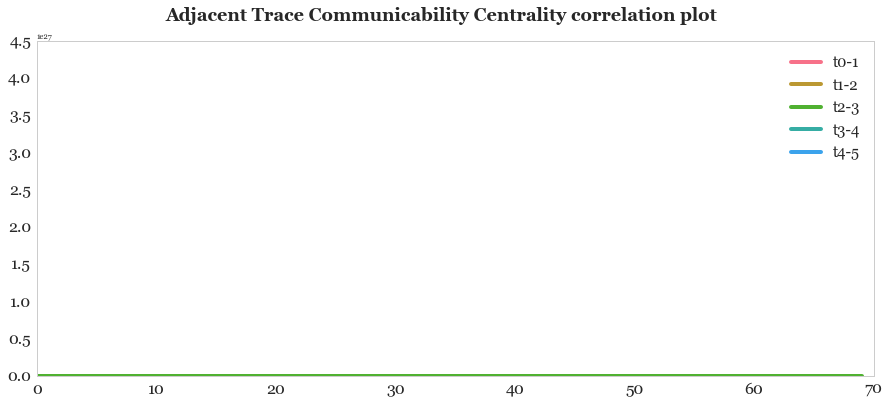

In [60]:
plt.suptitle('Adjacent Trace Communicability Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(commuC0),get_val(commuC1)),label='t0-1')
plt.plot(np.correlate(get_val(commuC1),get_val(commuC2)),label='t1-2')
plt.plot(np.correlate(get_val(commuC2),get_val(commuC3)),label='t2-3')
plt.plot(np.correlate(get_val(commuC3),get_val(commuC3)),label='t3-4') 
plt.plot(np.correlate(get_val(commuC4),get_val(commuC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

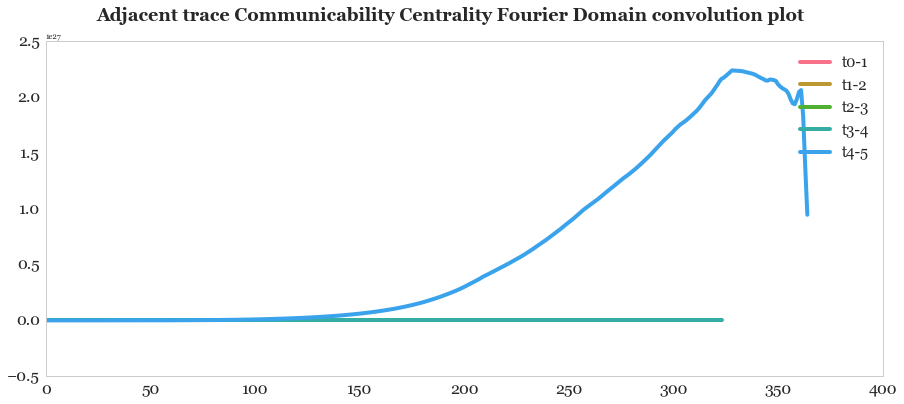

In [61]:
plt.suptitle('Adjacent trace Communicability Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(commuC0),get_val(commuC1)),label='t0-1')
plt.plot(fftconvolve(get_val(commuC1),get_val(commuC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(commuC2),get_val(commuC3)), label='t2-3')
plt.plot(fftconvolve(get_val(commuC3),get_val(commuC4)), label='t3-4')
plt.plot(fftconvolve(get_val(commuC4),get_val(commuC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


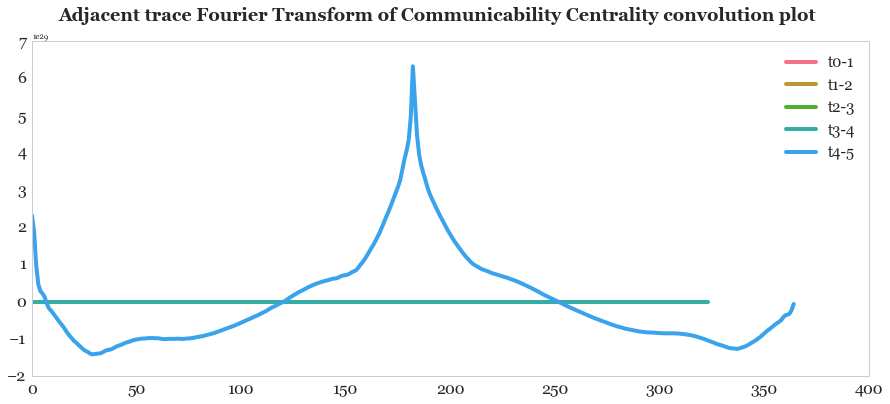

In [62]:
plt.suptitle('Adjacent trace Fourier Transform of Communicability Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(commuC0),fft_sig(commuC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(commuC1),fft_sig(commuC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(commuC2),fft_sig(commuC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(commuC3),fft_sig(commuC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(commuC4),fft_sig(commuC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


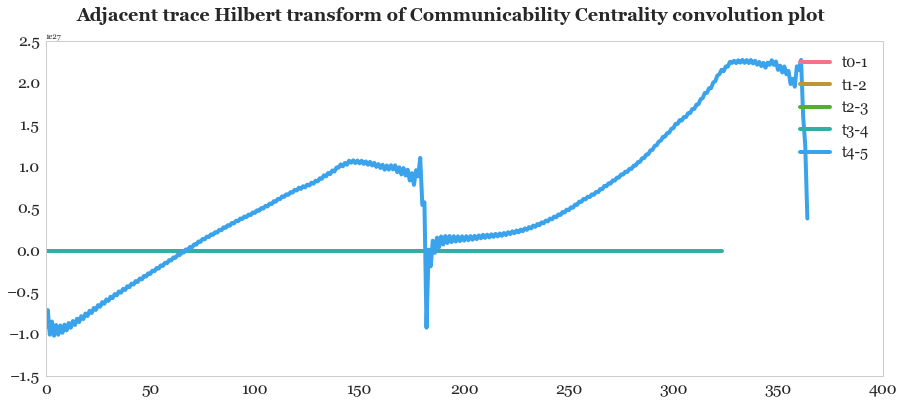

In [63]:
plt.suptitle('Adjacent trace Hilbert transform of Communicability Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(commuC0), hilbert_sig(commuC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(commuC1), hilbert_sig(commuC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(commuC2), hilbert_sig(commuC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(commuC3), hilbert_sig(commuC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(commuC4), hilbert_sig(commuC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Katz Centrality Histograms

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


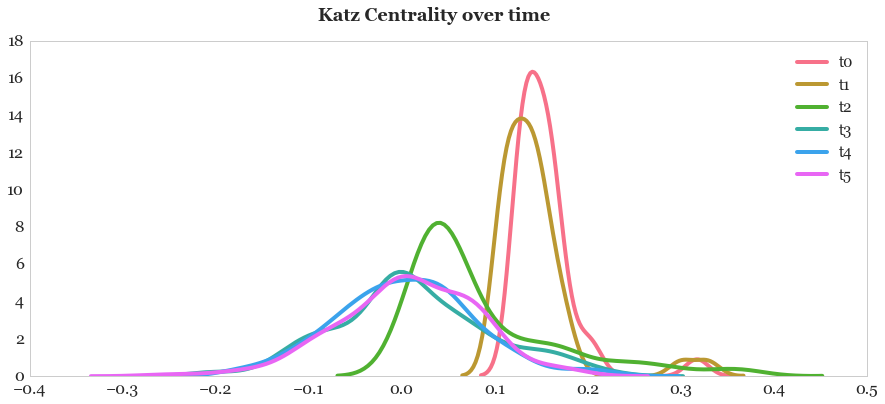

In [64]:
plt.suptitle('Katz Centrality over time', fontsize=18)
sns.distplot(get_val(katzC0), hist=False, label='t0')
sns.distplot(get_val(katzC1), hist=False, label='t1')
sns.distplot(get_val(katzC2), hist=False, label='t2')
sns.distplot(get_val(katzC3), hist=False, label='t3')
sns.distplot(get_val(katzC4), hist=False, label='t4')
sns.distplot(get_val(katzC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

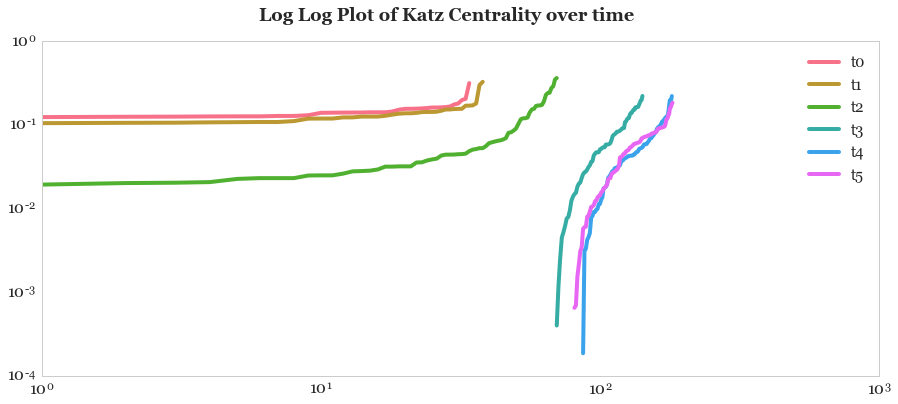

In [94]:
plt.suptitle('Log Log Plot of Katz Centrality over time', fontsize=18)

plt.loglog(get_val(katzC0), label='t0')
plt.loglog(get_val(katzC1), label='t1')
plt.loglog(get_val(katzC2), label='t2') 
plt.loglog(get_val(katzC3), label='t3')
plt.loglog(get_val(katzC4), label='t4')
plt.loglog(get_val(katzC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

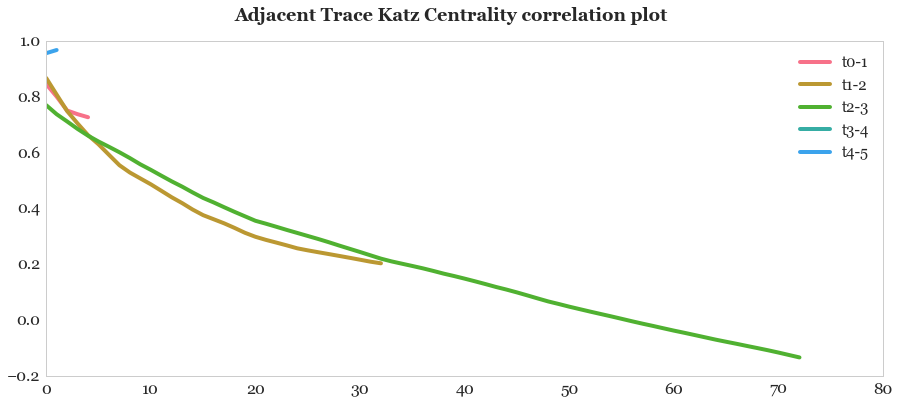

In [96]:
plt.suptitle('Adjacent Trace Katz Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(katzC0),get_val(katzC1)),label='t0-1')
plt.plot(np.correlate(get_val(katzC1),get_val(katzC2)),label='t1-2')
plt.plot(np.correlate(get_val(katzC2),get_val(katzC3)),label='t2-3')
plt.plot(np.correlate(get_val(katzC3),get_val(katzC3)),label='t3-4') 
plt.plot(np.correlate(get_val(katzC4),get_val(katzC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

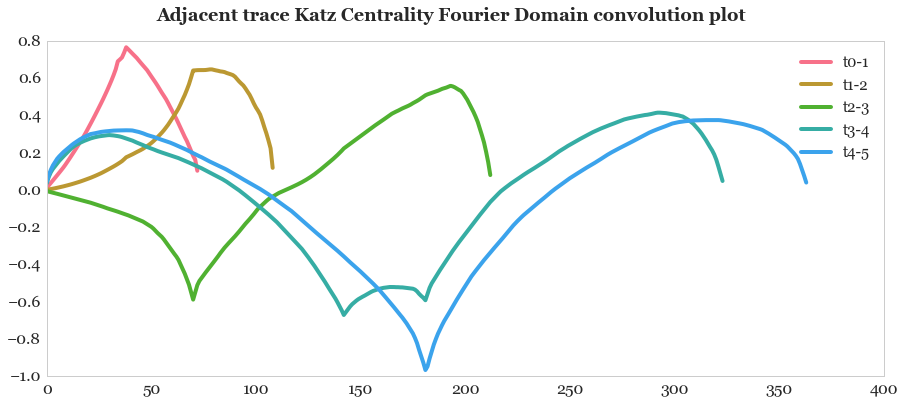

In [97]:
plt.suptitle('Adjacent trace Katz Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(katzC0),get_val(katzC1)),label='t0-1')
plt.plot(fftconvolve(get_val(katzC1),get_val(katzC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(katzC2),get_val(katzC3)), label='t2-3')
plt.plot(fftconvolve(get_val(katzC3),get_val(katzC4)), label='t3-4')
plt.plot(fftconvolve(get_val(katzC4),get_val(katzC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


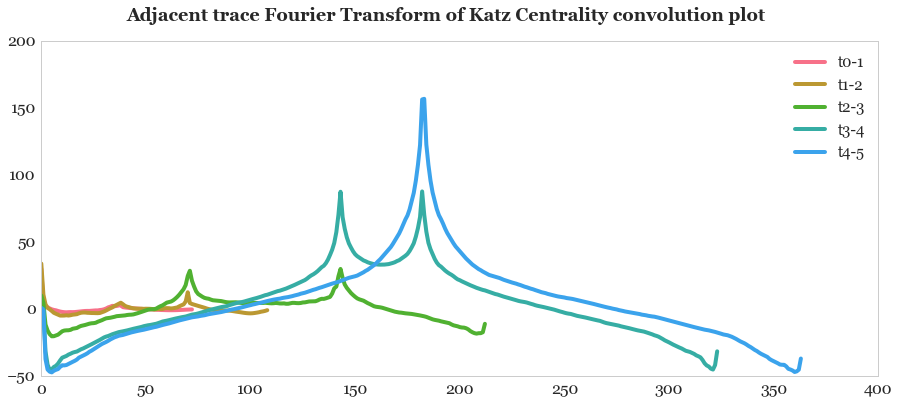

In [98]:
plt.suptitle('Adjacent trace Fourier Transform of Katz Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(katzC0),fft_sig(katzC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(katzC1),fft_sig(katzC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(katzC2),fft_sig(katzC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(katzC3),fft_sig(katzC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(katzC4),fft_sig(katzC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


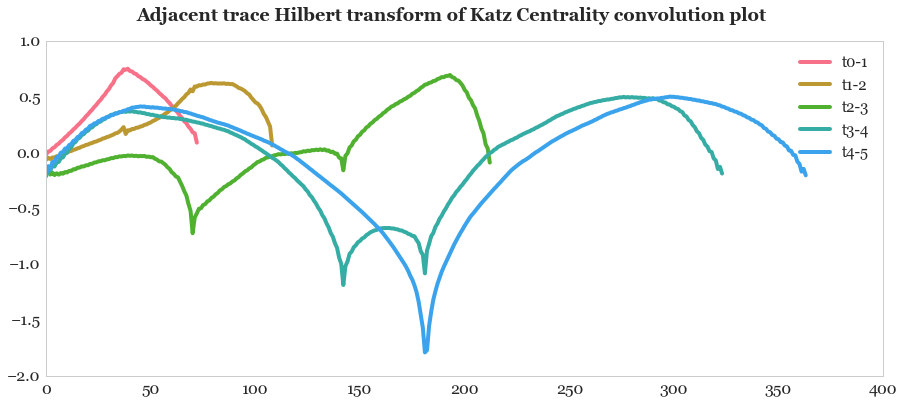

In [100]:
plt.suptitle('Adjacent trace Hilbert transform of Katz Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(katzC0), hilbert_sig(katzC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(katzC1), hilbert_sig(katzC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(katzC2), hilbert_sig(katzC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(katzC3), hilbert_sig(katzC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(katzC4), hilbert_sig(katzC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

### Load Centrality

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


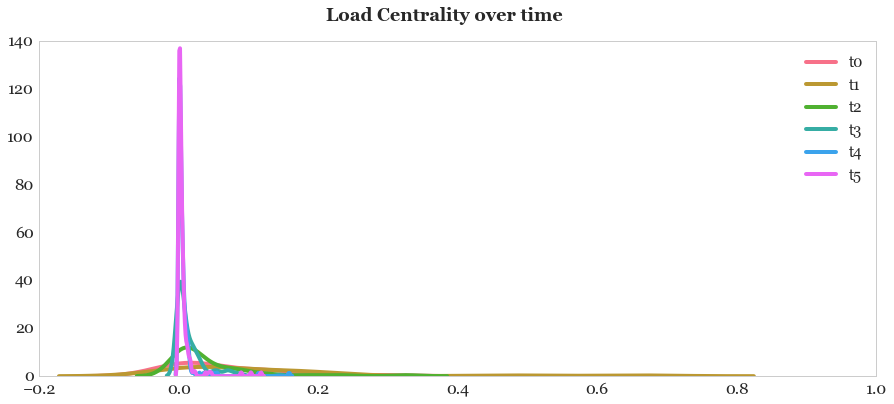

In [70]:
plt.suptitle('Load Centrality over time', fontsize=18)

sns.distplot(get_val(loadC0), hist=False, label='t0')
sns.distplot(get_val(loadC1), hist=False, label='t1')
sns.distplot(get_val(loadC2), hist=False, label='t2')
sns.distplot(get_val(loadC3), hist=False, label='t3')
sns.distplot(get_val(loadC4), hist=False, label='t4')
sns.distplot(get_val(loadC5), hist=False, label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

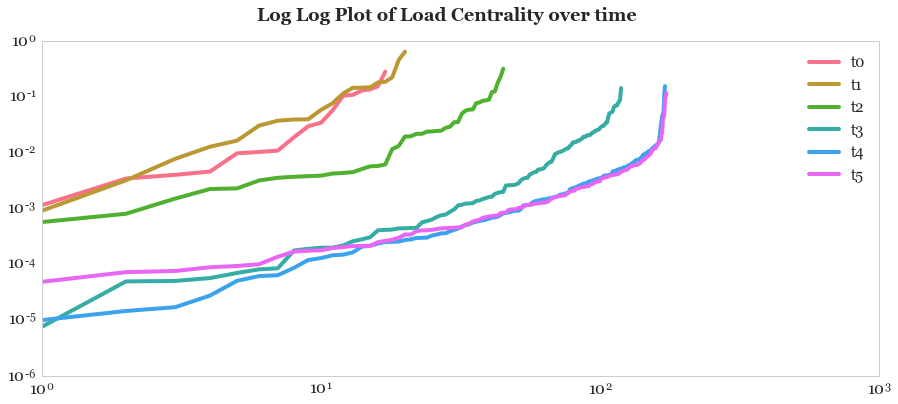

In [71]:
plt.suptitle('Log Log Plot of Load Centrality over time', fontsize=18)

plt.loglog(get_val(loadC0), label='t0')
plt.loglog(get_val(loadC1), label='t1')
plt.loglog(get_val(loadC2), label='t2') 
plt.loglog(get_val(loadC3), label='t3')
plt.loglog(get_val(loadC4), label='t4')
plt.loglog(get_val(loadC5), label='t5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

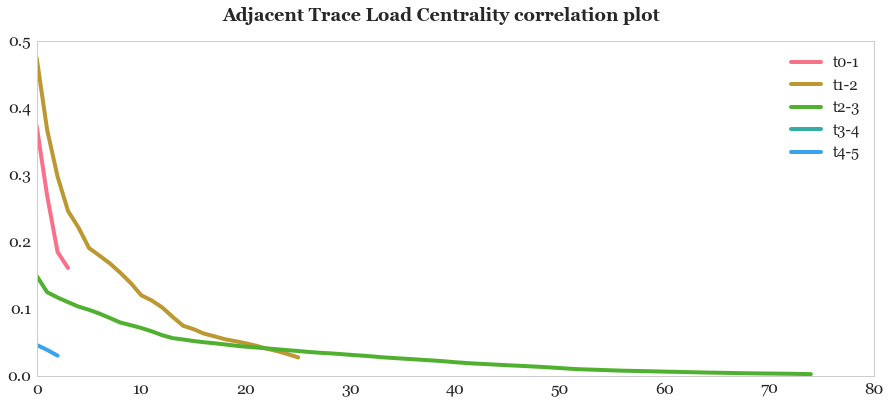

In [72]:
plt.suptitle('Adjacent Trace Load Centrality correlation plot', fontsize=18)

plt.plot(np.correlate(get_val(loadC0),get_val(loadC1)),label='t0-1')
plt.plot(np.correlate(get_val(loadC1),get_val(loadC2)),label='t1-2')
plt.plot(np.correlate(get_val(loadC2),get_val(loadC3)),label='t2-3')
plt.plot(np.correlate(get_val(loadC3),get_val(loadC3)),label='t3-4') 
plt.plot(np.correlate(get_val(loadC4),get_val(loadC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

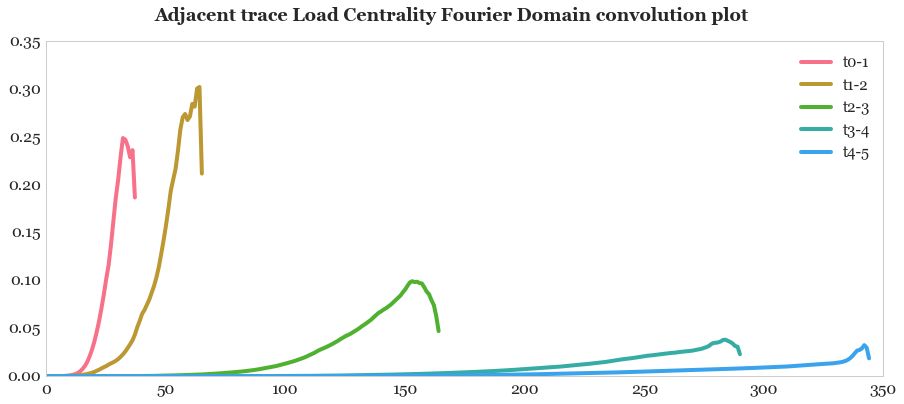

In [73]:
plt.suptitle('Adjacent trace Load Centrality Fourier Domain convolution plot', fontsize=18)

plt.plot(fftconvolve(get_val(loadC0),get_val(loadC1)),label='t0-1')
plt.plot(fftconvolve(get_val(loadC1),get_val(loadC2)),  label='t1-2')
plt.plot(fftconvolve(get_val(loadC2),get_val(loadC3)), label='t2-3')
plt.plot(fftconvolve(get_val(loadC3),get_val(loadC4)), label='t3-4')
plt.plot(fftconvolve(get_val(loadC4),get_val(loadC5)),  label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


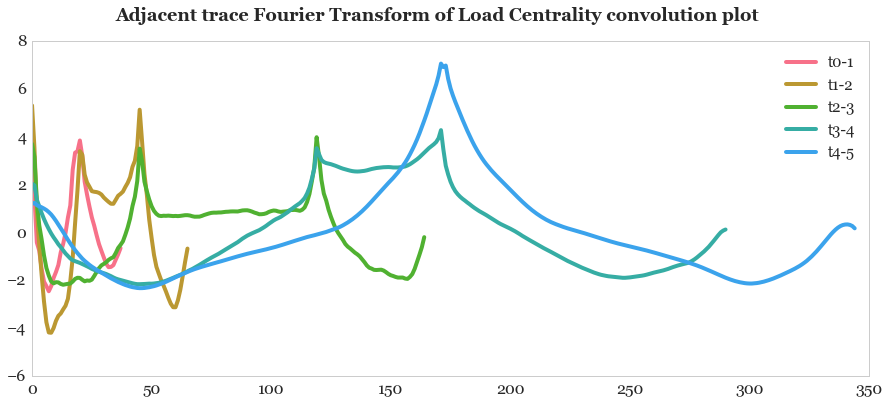

In [74]:
plt.suptitle('Adjacent trace Fourier Transform of Load Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(fft_sig(loadC0),fft_sig(loadC1)),label='t0-1')
plt.plot(np.convolve(fft_sig(loadC1),fft_sig(loadC2)),label='t1-2')
plt.plot(np.convolve(fft_sig(loadC2),fft_sig(loadC3)),label='t2-3')
plt.plot(np.convolve(fft_sig(loadC3),fft_sig(loadC4)),label='t3-4')
plt.plot(np.convolve(fft_sig(loadC4),fft_sig(loadC5)),label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


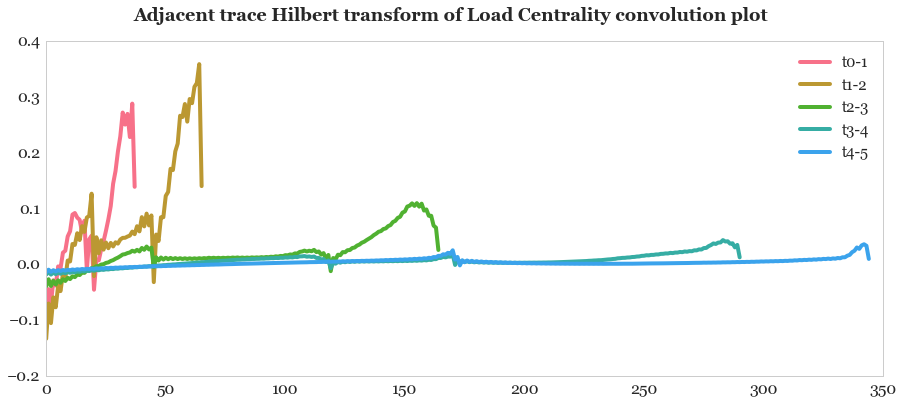

In [75]:
plt.suptitle('Adjacent trace Hilbert transform of Load Centrality convolution plot', fontsize=18)

plt.plot(np.convolve(hilbert_sig(loadC0), hilbert_sig(loadC1)), label='t0-1')
plt.plot(np.convolve(hilbert_sig(loadC1), hilbert_sig(loadC2)), label='t1-2')
plt.plot(np.convolve(hilbert_sig(loadC2), hilbert_sig(loadC3)),label='t2-3')
plt.plot(np.convolve(hilbert_sig(loadC3), hilbert_sig(loadC4)), label='t3-4')
plt.plot(np.convolve(hilbert_sig(loadC4), hilbert_sig(loadC5)), label='t4-5')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=1, fontsize=15)

## Centrality Analysis with averaging

In [76]:
def avg_cent(cent):
    avg = sum(set(cent.values()))/len(cent)
    return avg

In [77]:
def cal_stat(net):
    degC = nx.degree_centrality(net)
    cloC = nx.closeness_centrality(net)
    betC = nx.betweenness_centrality(net)
    eigC = nx.eigenvector_centrality_numpy(net)
    algC = nx.algebraic_connectivity(net)
    clustC = nx.average_clustering(net)
    commC = nx.communicability_centrality(net)
    katzC = nx.katz_centrality_numpy(net)
    loadC= nx.load_centrality(net)
    
    return [avg_cent(degC),avg_cent(cloC),\
            avg_cent(betC),avg_cent(eigC),\
            algC, clustC, avg_cent(commC),\
            avg_cent(katzC), avg_cent(loadC)]

## Calculate Centrality Statistics at different time steps

In [78]:
deg0, clo0, bet0, eig0, alg0, clust0, commC0, katz0,load0 = cal_stat(Gt0)
deg1, clo1, bet1, eig1, alg1, clust1, commC1, katz1,load1 = cal_stat(Gt1)
deg2, clo2, bet2, eig2, alg2, clust2, commC2, katz2, load2 = cal_stat(Gt2)
deg3, clo3, bet3, eig3, alg3, clust3, commC3, katz3,load3 = cal_stat(Gt3)
deg4, clo4, bet4, eig4, alg4, clust4, commC4, katz4,load4 = cal_stat(Gt4)
deg5, clo5, bet5, eig5, alg5, clust5, commC5, katz5, load5 = cal_stat(Gt5)

In [79]:
print('Avg Deg Cent',deg0)
print('Avg Clo Cent',clo0)
print('Avg Bet Cent',bet0)
print('Avg Eig Cent',eig0)
print('Avg Alg Connectivity',alg0)
print('Avg Clustering Coeff',clust0)
print('Avg Communicability Cent',commC0)
print('Avg Katz Cent',katz0)
print('Avg Load Cent', load0)

Avg Deg Cent 0.018826135105204873
Avg Clo Cent 0.10466121433401401
Avg Bet Cent 0.02598384787834589
Avg Eig Cent 0.07773852412753667
Avg Alg Connectivity 0.0
Avg Clustering Coeff 0.026004228329809725
Avg Communicability Cent 3.9809326044505062
Avg Katz Cent 0.12524033960814704
Avg Load Cent 0.02598384787834589


In [80]:
print('Avg Deg Cent',deg1)
print('Avg Clo Cent',clo1)
print('Avg Bet Cent',bet1)
print('Avg Eig Cent',eig1)
print('Avg Alg Connectivity',alg1)
print('Avg Clustering Coeff',clust1)
print('Avg Communicability Cent',commC1)
print('Avg Katz Cent',katz1)

Avg Deg Cent 0.021719858156028365
Avg Clo Cent 0.16550053458700076
Avg Bet Cent 0.05436709836571077
Avg Eig Cent 0.08950640258093145
Avg Alg Connectivity 0.0
Avg Clustering Coeff 0.08708721833721834
Avg Communicability Cent 5.874869893519794
Avg Katz Cent 0.11654349936679959


In [81]:
stat_df = pd.DataFrame([deg0,deg1,deg2,deg3,deg4,deg5])

In [82]:
#calculate density
den0 = nx.density(Gt0)
den1 = nx.density(Gt1)
den2 = nx.density(Gt2)
den3 = nx.density(Gt3)
den4 = nx.density(Gt4)
den5 = nx.density(Gt5)

In [83]:
stat_df['Closeness'] = pd.DataFrame([clo0,clo1,clo2,clo3,clo4,clo5])
stat_df['Betweeness'] = pd.DataFrame([bet0,bet1,bet2,bet3,bet4,bet5])
stat_df['Eig'] = pd.DataFrame([eig0,eig1,eig2,eig3,eig4,eig5])
stat_df['AlgConnect'] = pd.DataFrame([alg0,alg1,alg2,alg3,alg4,alg5])
stat_df['ClustCoeff'] = pd.DataFrame([clust0,clust1,clust2,clust3,clust4,clust5])
stat_df['Communicability'] = pd.DataFrame([commC0,commC1,commC2,commC3,commC4,commC5])
stat_df['Katz'] = pd.DataFrame([katz0,katz1,katz2,katz3,katz4,katz5])
stat_df['Load']=pd.DataFrame([load0,load1,load2,load3,load4,load5])
stat_df['Density'] = pd.DataFrame([den0,den1,den2,den3,den4,den5])

In [84]:
stat_df.columns.values[0]='Deg'

In [85]:
stat_df.head()

Deg  Closeness  Betweeness       Eig  AlgConnect  ClustCoeff  \
0  0.018826   0.104661    0.025984  0.077739    0.000000    0.026004   
1  0.021720   0.165501    0.054367  0.089506    0.000000    0.087087   
2  0.020570   0.223937    0.025495  0.066241    0.000000    0.185696   
3  0.031813   0.253585    0.012739  0.056478    0.121915    0.462544   
4  0.047889   0.276022    0.006152  0.058781    0.000000    0.493717   

   Communicability      Katz      Load   Density  
0     3.980933e+00  0.125240  0.025984  0.057586  
1     5.874870e+00  0.116543  0.054367  0.057624  
2     1.206113e+02  0.076152  0.025495  0.054430  
3     6.140791e+06  0.011703  0.012739  0.081651  
4     1.009380e+12  0.003815  0.006151  0.123401

In [86]:
stat_df.mean()

Deg                3.167631e-02
Closeness          2.157075e-01
Betweeness         2.176173e-02
Eig                6.800322e-02
AlgConnect         2.031923e-02
ClustCoeff         2.911402e-01
Communicability    1.302104e+12
Katz               5.675227e-02
Load               2.176157e-02
Density            8.438583e-02
dtype: float64

In [87]:
stat_df.std()

Deg                1.384896e-02
Closeness          6.782144e-02
Betweeness         1.829567e-02
Eig                1.307165e-02
AlgConnect         4.977175e-02
ClustCoeff         2.162089e-01
Communicability    2.725070e+12
Katz               5.646791e-02
Load               1.829584e-02
Density            3.490777e-02
dtype: float64

In [88]:
corr_stat = stat_df.corr()
corr_stat

Deg  Closeness  Betweeness       Eig  AlgConnect  \
Deg              1.000000   0.805217   -0.753366 -0.689411    0.004844   
Closeness        0.805217   1.000000   -0.682081 -0.822651    0.273602   
Betweeness      -0.753366  -0.682081    1.000000  0.938821   -0.241596   
Eig             -0.689411  -0.822651    0.938821  1.000000   -0.431955   
AlgConnect       0.004844   0.273602   -0.241596 -0.431955    1.000000   
ClustCoeff       0.897836   0.934724   -0.812555 -0.875959    0.388376   
Communicability  0.719954   0.469556   -0.497897 -0.385656   -0.234084   
Katz            -0.876722  -0.943750    0.839290  0.910251   -0.390831   
Load            -0.753372  -0.682084    1.000000  0.938820   -0.241589   
Density          0.995111   0.752929   -0.762315 -0.668044   -0.038384   

                 ClustCoeff  Communicability      Katz      Load   Density  
Deg                0.897836         0.719954 -0.876722 -0.753372  0.995111  
Closeness          0.934724         0.469556 -0.943750 -0.682084  0.752929  
Betweeness        -0.812555        -0.497897  0.839290  1.000000 -0.762315  
Eig               -0.875959        -0.385656  0.910251  0.938820 -0.668044  
AlgConnect         0.388376        -0.234084 -0.390831 -0.241589 -0.038384  
ClustCoeff         1.000000         0.532793 -0.996347 -0.812557  0.864887  
Communicability    0.532793         1.000000 -0.508849 -0.497902  0.758456  
Katz              -0.996347        -0.508849  1.000000  0.839292 -0.842771  
Load              -0.812557        -0.497902  0.839292  1.000000 -0.762321  
Density            0.864887         0.758456 -0.842771 -0.762321  1.000000

In [89]:
sns.heatmap(corr_stat, cmap='PiYG')
plt.title('Heatmap of Correlation Matrix of Network Statistics', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

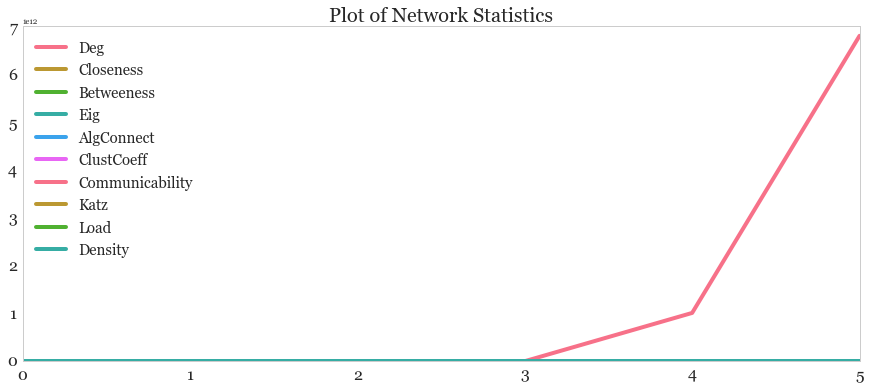

In [166]:
stat_df.plot(colormap='viridis', fontsize=14)
plt.title('Plot of Network Statistics', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=2, fontsize=15)

In [164]:
stat_df.plot(colormap='viridis',logy=True, fontsize=14)
plt.title('Log Plot of Average Network Statistics', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc=0, fontsize=15)

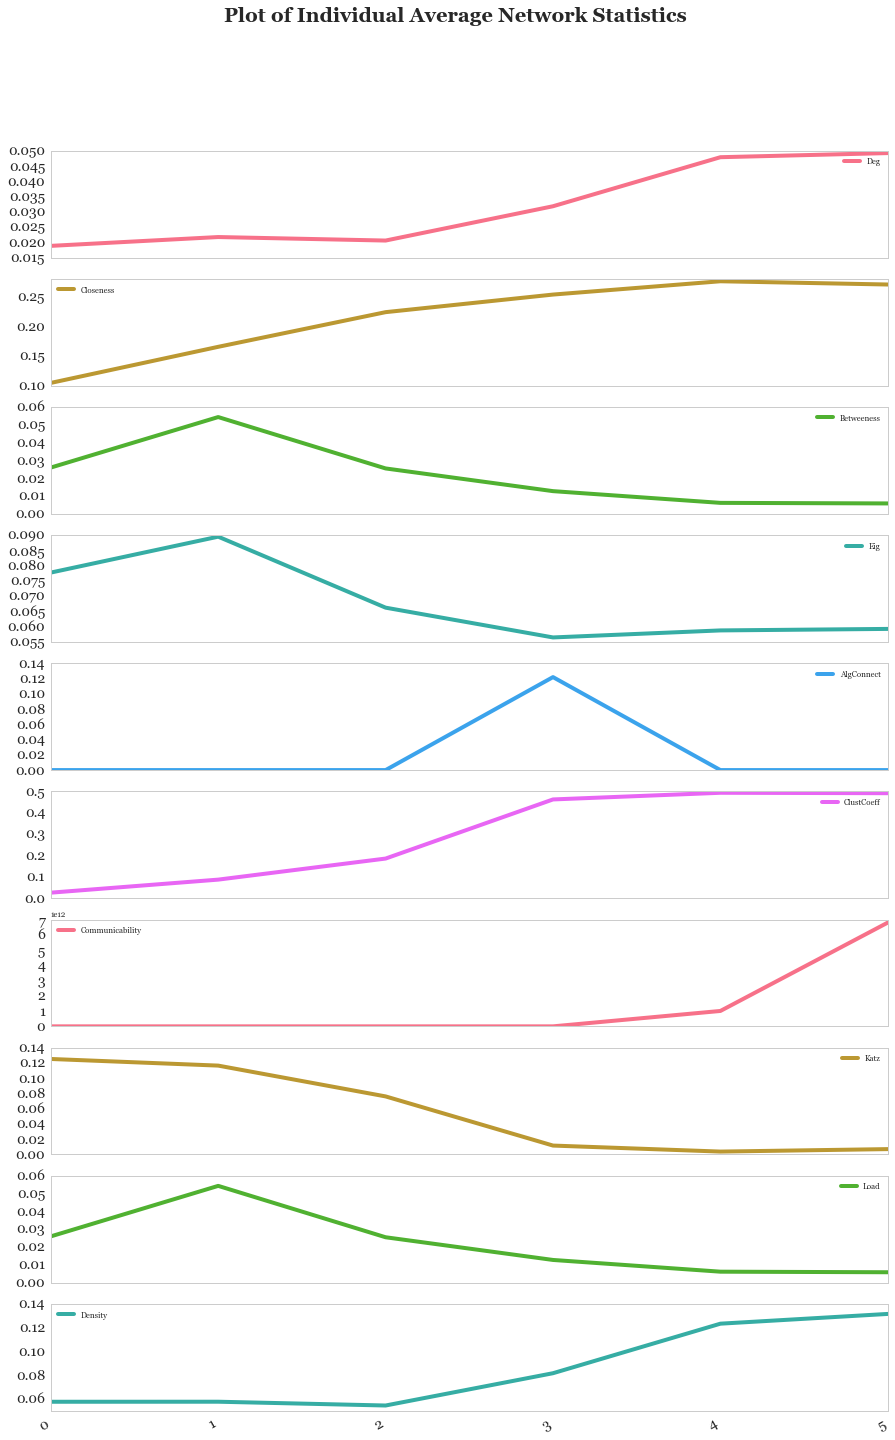

In [165]:
stat_df.plot(colormap='viridis',subplots=True, figsize=(15,25), fontsize=14, sharex=True)
plt.suptitle('Plot of Individual Average Network Statistics', fontsize=20)

In [93]:
sns.pairplot(stat_df, markers="+", plot_kws=dict(s=80, edgecolor="b", linewidth=5))
plt.suptitle('Scatter Plot Matrix of Network Statistics', fontsize=25)

# Assortativity Analysis

In [112]:
def cal_assort_att(net):
    dac = nx.degree_assortativity_coefficient(net)
    dpc = nx.degree_pearson_correlation_coefficient(net)
    avg_neigdeg = nx.average_neighbor_degree(net)
    avg_degconnect = nx.average_degree_connectivity(net)
    triangles = nx.triangles(net)
    
    return [dac,dpc,avg_neigdeg, avg_degconnect,triangles]

In [103]:
dac0 = nx.degree_assortativity_coefficient(Gt0)

-0.25126403290770422

In [104]:
nx.degree_pearson_correlation_coefficient(Gt0)

-0.25126403290770427

## Calculate Assortativity statistics for each time step

In [114]:
dac0,dpc0,avg_neigdeg0, avg_degconnect0, triangles0= cal_assort_att(Gt0)
dac1,dpc1,avg_neigdeg1, avg_degconnect1, triangles1= cal_assort_att(Gt1)
dac2,dpc2,avg_neigdeg2, avg_degconnect2, triangles2= cal_assort_att(Gt2)
dac3,dpc3,avg_neigdeg3, avg_degconnect3, triangles3= cal_assort_att(Gt3)
dac4,dpc4,avg_neigdeg4, avg_degconnect4, triangles4= cal_assort_att(Gt4)
dac5,dpc5,avg_neigdeg5, avg_degconnect5, triangles5= cal_assort_att(Gt5)

In [143]:
avg_cent(avg_neigdeg0)

2.190131186642814

In [155]:
assor_df = pd.DataFrame([dac0,dac1,dac2,dac3,dac4,dac5])
assor_df['DegPearCC'] = pd.DataFrame([dpc0,dpc1,dpc2,dpc3,dpc4,dpc5])

In [156]:
assor_df['Avg(AvgNeighDeg)'] = pd.DataFrame([avg_cent(avg_neigdeg0),avg_cent(avg_neigdeg1),\
                                             avg_cent(avg_neigdeg2),avg_cent(avg_neigdeg3),\
                                             avg_cent(avg_neigdeg4), avg_cent(avg_neigdeg5)])

In [157]:
assor_df['Avg(AvgDegConnect)'] = pd.DataFrame([avg_cent(avg_degconnect0),avg_cent(avg_degconnect1),\
                                             avg_cent(avg_degconnect2),avg_cent(avg_degconnect3),\
                                             avg_cent(avg_degconnect4), avg_cent(avg_degconnect5)])

In [168]:
assor_df['AvgTriangles'] = pd.DataFrame([avg_cent(triangles0),avg_cent(triangles1),\
                                             avg_cent(triangles2),avg_cent(triangles3),\
                                             avg_cent(triangles4), avg_cent(triangles5)])

In [169]:
assor_df.columns.values[0]= 'DegAssorCoeff'
assor_df

DegAssorCoeff  DegPearCC  Avg(AvgNeighDeg)  Avg(AvgDegConnect)  \
0      -0.251264  -0.251264          2.190131            3.600092   
1      -0.226108  -0.226108          2.896955            4.906208   
2      -0.178525  -0.178525          5.563177            9.037252   
3       0.074870   0.074870         16.332357           17.412081   
4      -0.040770  -0.040770         31.159027           32.211278   
5      -0.046592  -0.046592         32.873515           34.366099   

   AvgTriangles  
0      0.023256  
1      0.125000  
2      2.762500  
3     28.272727  
4    104.180328  
5    116.304348

In [170]:
assor_df.plot(colormap='viridis',subplots=True, figsize=(15,25), fontsize=14, sharex=True)
plt.suptitle('Plot of Individual Average Network Assortativity Statistics', fontsize=20)
#plt.legend(loc=0, fontsize=18)

In [222]:
stat_df2 = assor_df.join(stat_df)

In [223]:
stat_df2.head()

DegAssorCoeff  DegPearCC  Avg(AvgNeighDeg)  Avg(AvgDegConnect)  \
0      -0.251264  -0.251264          2.190131            3.600092   
1      -0.226108  -0.226108          2.896955            4.906208   
2      -0.178525  -0.178525          5.563177            9.037252   
3       0.074870   0.074870         16.332357           17.412081   
4      -0.040770  -0.040770         31.159027           32.211278   

   AvgTriangles       Deg  Closeness  Betweeness       Eig  AlgConnect  \
0      0.023256  0.018826   0.104661    0.025984  0.077739    0.000000   
1      0.125000  0.021720   0.165501    0.054367  0.089506    0.000000   
2      2.762500  0.020570   0.223937    0.025495  0.066241    0.000000   
3     28.272727  0.031813   0.253585    0.012739  0.056478    0.121915   
4    104.180328  0.047889   0.276022    0.006152  0.058781    0.000000   

   ClustCoeff  Communicability      Katz      Load   Density  
0    0.026004     3.980933e+00  0.125240  0.025984  0.057586  
1    0.087087     5.874870e+00  0.116543  0.054367  0.057624  
2    0.185696     1.206113e+02  0.076152  0.025495  0.054430  
3    0.462544     6.140791e+06  0.011703  0.012739  0.081651  
4    0.493717     1.009380e+12  0.003815  0.006151  0.123401

In [224]:
stat_df2.describe()

DegAssorCoeff  DegPearCC  Avg(AvgNeighDeg)  Avg(AvgDegConnect)  \
count       6.000000   6.000000          6.000000            6.000000   
mean       -0.111398  -0.111398         15.169194           16.922168   
std         0.127366   0.127366         14.012924           13.581757   
min        -0.251264  -0.251264          2.190131            3.600092   
25%        -0.214212  -0.214212          3.563511            5.938969   
50%        -0.112558  -0.112558         10.947767           13.224666   
75%        -0.042225  -0.042225         27.452360           28.511479   
max         0.074870   0.074870         32.873515           34.366099   

       AvgTriangles       Deg  Closeness  Betweeness       Eig  AlgConnect  \
count      6.000000  6.000000   6.000000    6.000000  6.000000    6.000000   
mean      41.944693  0.031676   0.215707    0.021762  0.068003    0.020319   
std       54.094534  0.013849   0.067821    0.018296  0.013072    0.049772   
min        0.023256  0.018826   0.104661    0.005834  0.056478    0.000000   
25%        0.784375  0.020857   0.180110    0.007798  0.058904    0.000000   
50%       15.517614  0.026767   0.238761    0.019117  0.062758    0.000000   
75%       85.203428  0.043870   0.266301    0.025862  0.074864    0.000000   
max      116.304348  0.049240   0.276022    0.054367  0.089506    0.121915   

       ClustCoeff  Communicability      Katz      Load   Density  
count    6.000000     6.000000e+00  6.000000  6.000000  6.000000  
mean     0.291140     1.302104e+12  0.056752  0.021762  0.084386  
std      0.216209     2.725070e+12  0.056468  0.018296  0.034908  
min      0.026004     3.980933e+00  0.003815  0.005833  0.054430  
25%      0.111739     3.455898e+01  0.008220  0.007798  0.057595  
50%      0.324120     3.070456e+06  0.043928  0.019117  0.069637  
75%      0.484481     7.570362e+11  0.106446  0.025862  0.112964  
max      0.493717     6.803237e+12  0.125240  0.054367  0.131623

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text yticklabel objects>)

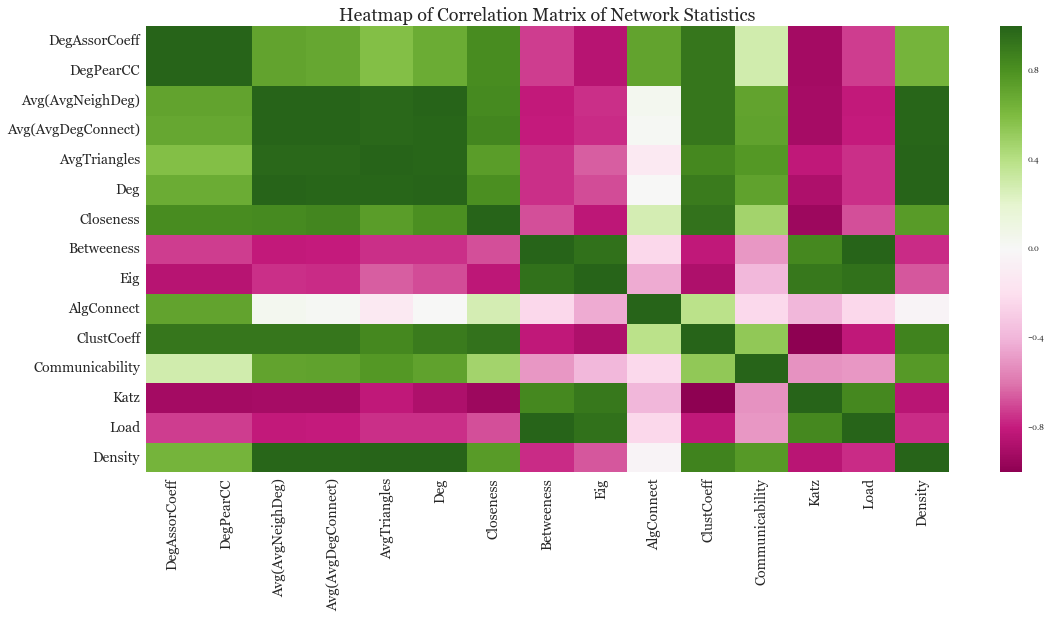

In [229]:
plt.figure(figsize=(18,8))
sns.heatmap(stat_df2.corr(), cmap='PiYG')
plt.title('Heatmap of Correlation Matrix of Network Statistics', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Stationarity

In [200]:
adjM0 = nx.adjacency_matrix(Gt0)
adjM1 = nnx.adjacency_matrix(Gt1)

In [251]:
np.setdiff1d(modM0,modM1)

ValueError: all the input arrays must have same number of dimensions

In [202]:
for i in adjM0:
    print(i)

[[ <43x43 sparse matrix of type '<class 'numpy.int32'>'
	with 93 stored elements in Compressed Sparse Row format>]]


In [187]:
lapM0 = nx.laplacian_matrix(Gt0)

In [189]:
for i in lapM0:
    print(i)

  (0, 0)	2
  (0, 2)	-1
  (0, 13)	-1

  (0, 0)	-1
  (0, 2)	2
  (0, 34)	-1
  (0, 3)	1
  (0, 5)	-1
  (0, 4)	2
  (0, 5)	-1
  (0, 14)	-1
  (0, 3)	-1
  (0, 4)	-1
  (0, 5)	11
  (0, 7)	-1
  (0, 12)	-1
  (0, 13)	-1
  (0, 15)	-1
  (0, 18)	-1
  (0, 31)	-1
  (0, 34)	-1
  (0, 38)	-1
  (0, 39)	-1
  (0, 6)	1
  (0, 19)	-1
  (0, 5)	-1
  (0, 7)	1
  (0, 8)	5
  (0, 9)	-1
  (0, 10)	-1
  (0, 31)	-1
  (0, 32)	-1
  (0, 37)	-1
  (0, 8)	-1
  (0, 9)	1
  (0, 8)	-1
  (0, 10)	1
  (0, 11)	2
  (0, 22)	-1
  (0, 30)	-1
  (0, 5)	-1
  (0, 12)	2
  (0, 42)	-1
  (0, 0)	-1
  (0, 5)	-1
  (0, 13)	5
  (0, 18)	-1
  (0, 21)	-1
  (0, 42)	-1
  (0, 4)	-1
  (0, 14)	2
  (0, 31)	-1
  (0, 5)	-1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	-1
  (0, 16)	-1
  (0, 17)	1
  (0, 5)	-1
  (0, 13)	-1
  (0, 18)	2
  (0, 6)	-1
  (0, 19)	3
  (0, 27)	-1
  (0, 40)	-1

  (0, 13)	-1
  (0, 21)	1
  (0, 11)	-1
  (0, 22)	1
  (0, 23)	1
  (0, 28)	-1
  (0, 24)	1
  (0, 41)	-1
  (0, 25)	1
  (0, 41)	-1
  (0, 26)	1
  (0, 41)	-1
  (0, 19)	-1
  (0, 27)	1
  (0, 23)	-1
  (0, 28)	

In [244]:
modM0 = nx.modularity_matrix(Gt0)
modM1 = nx.modularity_matrix(Gt1)
modM2 = nx.modularity_matrix(Gt2)
modM3 = nx.modularity_matrix(Gt3)
modM4 = nx.modularity_matrix(Gt4)
modM5 = nx.modularity_matrix(Gt5)


In [191]:
for i in modM0:
    print(i)

[[-0.03846154 -0.01923077  0.96153846 -0.01923077 -0.03846154 -0.23076923
  -0.01923077 -0.01923077 -0.09615385 -0.01923077 -0.01923077 -0.05769231
  -0.03846154  0.90384615 -0.05769231 -0.01923077 -0.01923077 -0.01923077
  -0.03846154 -0.07692308 -0.01923077 -0.01923077 -0.01923077 -0.01923077
  -0.01923077 -0.01923077 -0.01923077 -0.03846154 -0.05769231 -0.05769231
  -0.03846154 -0.05769231 -0.01923077 -0.01923077 -0.03846154 -0.03846154
  -0.01923077 -0.03846154 -0.01923077 -0.03846154 -0.01923077 -0.07692308
  -0.09615385]]
[[-0.01923077  0.99038462 -0.01923077 -0.00961538 -0.01923077 -0.11538462
  -0.00961538 -0.00961538 -0.04807692 -0.00961538 -0.00961538 -0.02884615
  -0.01923077 -0.04807692 -0.02884615 -0.00961538 -0.00961538 -0.00961538
  -0.01923077 -0.03846154 -0.00961538 -0.00961538 -0.00961538 -0.00961538
  -0.00961538 -0.00961538 -0.00961538 -0.01923077 -0.02884615 -0.02884615
  -0.01923077 -0.02884615 -0.00961538 -0.00961538 -0.01923077 -0.01923077
  -0.00961538 -0.01923

In [234]:
lapnM0 = nx.normalized_laplacian_matrix(Gt0)

In [243]:
for i in lapnM0:
    print(i)

  (0, 0)	1.0
  (0, 2)	-0.5
  (0, 13)	-0.316227766017

  (0, 0)	-0.5
  (0, 2)	1.0
  (0, 34)	-0.5
  (0, 3)	1.0
  (0, 5)	-0.288675134595
  (0, 4)	1.0
  (0, 5)	-0.204124145232
  (0, 14)	-0.408248290464
  (0, 3)	-0.288675134595
  (0, 4)	-0.204124145232
  (0, 5)	0.916666666667
  (0, 7)	-0.288675134595
  (0, 12)	-0.204124145232
  (0, 13)	-0.129099444874
  (0, 15)	-0.288675134595
  (0, 18)	-0.204124145232
  (0, 31)	-0.166666666667
  (0, 34)	-0.204124145232
  (0, 38)	-0.288675134595
  (0, 39)	-0.204124145232
  (0, 6)	1.0
  (0, 19)	-0.5
  (0, 5)	-0.288675134595
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	-0.4472135955
  (0, 10)	-0.4472135955
  (0, 31)	-0.258198889747
  (0, 32)	-0.4472135955
  (0, 37)	-0.316227766017
  (0, 8)	-0.4472135955
  (0, 9)	1.0
  (0, 8)	-0.4472135955
  (0, 10)	1.0
  (0, 11)	0.666666666667
  (0, 22)	-0.57735026919
  (0, 30)	-0.408248290464
  (0, 5)	-0.204124145232
  (0, 12)	1.0
  (0, 42)	-0.316227766017
  (0, 0)	-0.316227766017
  (0, 5)	-0.129099444874
  (0, 13)	1.0
  (0, 18)	-0.31

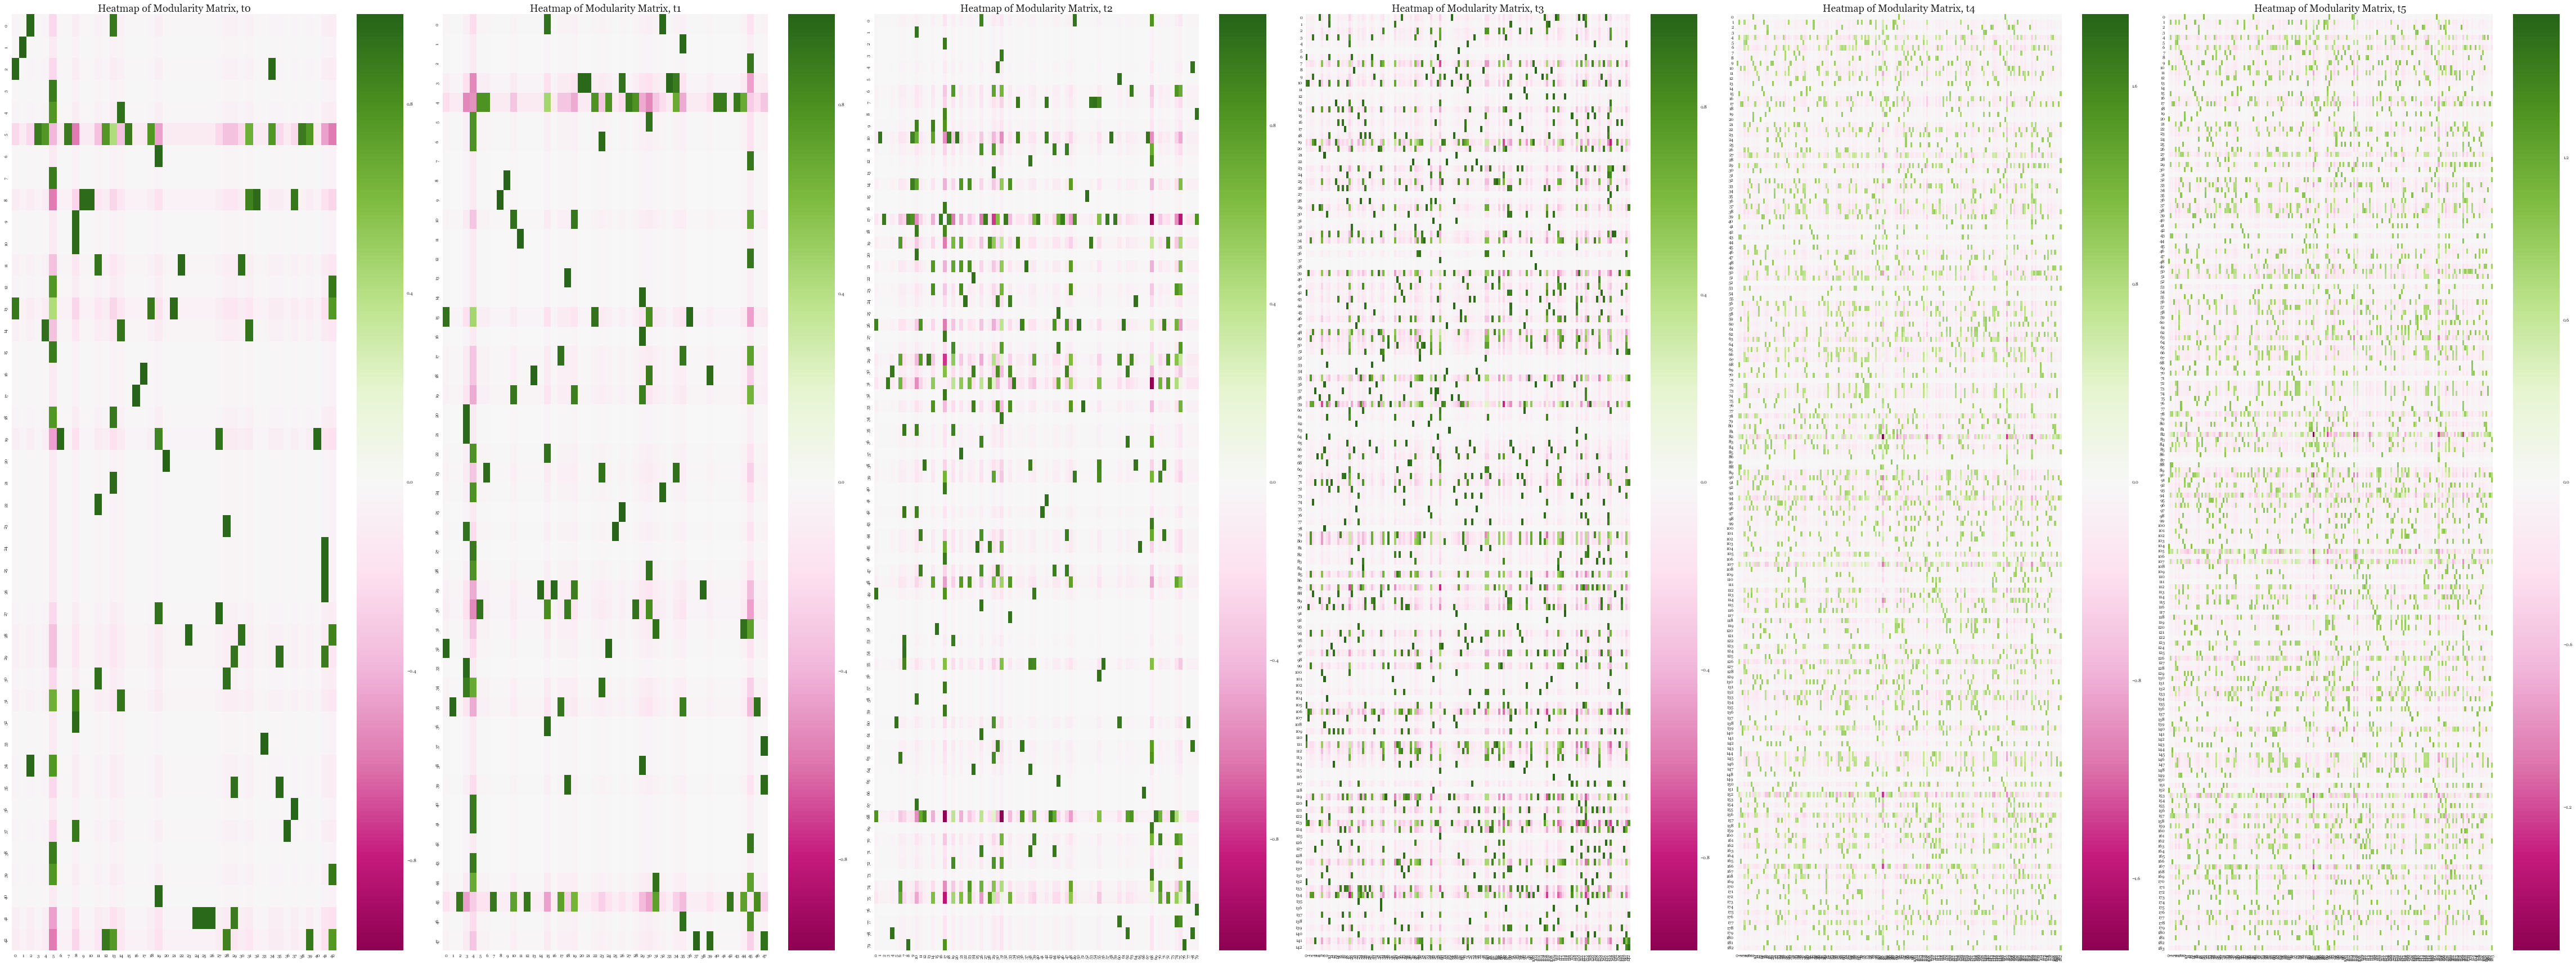

In [252]:
plt.figure(figsize=(64,24))

plt.subplot(161)
sns.heatmap(modM0,cmap='PiYG')
plt.title('Heatmap of Modularity Matrix, t0', fontsize=18)

plt.subplot(162)
sns.heatmap(modM1, cmap='PiYG')
plt.title('Heatmap of Modularity Matrix, t1', fontsize=18)

plt.subplot(163)
sns.heatmap(modM2, cmap='PiYG')
plt.title('Heatmap of Modularity Matrix, t2', fontsize=18)

plt.subplot(164)
sns.heatmap(modM3, cmap='PiYG')
plt.title('Heatmap of Modularity Matrix, t3', fontsize=18)

plt.subplot(165)
sns.heatmap(modM4, cmap='PiYG')
plt.title('Heatmap of Modularity Matrix, t4', fontsize=18)

plt.subplot(166)
sns.heatmap(modM5, cmap='PiYG')
plt.title('Heatmap of Modularity Matrix, t5', fontsize=18)

plt.tight_layout()